# Cryptocurrency Price Prediction Using Deep Learning

Author - Bhavesh Nareshkumar Pabnani

## Overview
In this project, we aim to predict the future close prices of Bitcoin (BTC) against the Indian Rupee (INR) using deep learning techniques. Leveraging historical minute-wise candlestick data from the Pi42 cryptocurrency exchange API, we explore various models, including LSTM, N-BEATS, and Seq2Seq with Attention mechanisms, to forecast the next time step close price based on previous time steps.

## Problem Statement
The rapid fluctuations in cryptocurrency prices pose significant challenges for traders and investors. Accurate price forecasting can aid in making informed decisions and optimizing trading strategies. This project focuses on:

- **Data Acquisition**: Scraping historical price data and technical indicators.
- **Feature Engineering**: Creating relevant features that enhance model performance.
- **Modeling**: Implementing various deep learning architectures to predict future prices.
- **Evaluation**: Comparing model performances to identify the most effective forecasting approach.

## Models Implemented
I have implemented **13 predictive models** to tackle the problem, including:

1. **Linear Regression (LR)**
2. **Random Forest Regressor (RF)**
3. **XGBoost (XGB)**
4. **AutoRegressive Integrated Moving Average (ARIMA)**
5. **Long Short-Term Memory (LSTM)**
6. **LSTM with Attention**
7. **CNN + LSTM**
8. **Bidirectional LSTM (BiLSTM)**
9. **Transformer**
10. **Facebook Prophet**
11. **N-BEATS**
12. **Seq2Seq with Attention**
13. **Time Series Forecasting Transformer (TFT)**

## Feature Engineering
To enhance model performance, I engineered several features from the historical data, including:

### Technical Indicators
1. **Relative Strength Index (RSI)**: Measures the speed and change of price movements.
2. **Simple Moving Average (SMA)**: Averages the closing prices over a specified period.
3. **Exponential Moving Average (EMA)**: A type of moving average that gives more weight to recent prices.
4. **Moving Average Convergence Divergence (MACD)**: A trend-following momentum indicator that shows the relationship between two moving averages.
5. **Bollinger Bands**: Consists of a middle band (SMA) and two outer bands that are standard deviations away from the middle band.
6. **Average True Range (ATR)**: Measures market volatility by decomposing the entire range of an asset price for that period.
7. **Stochastic Oscillator**: A momentum indicator comparing a particular closing price of a security to a range of its prices over a certain period.
8. **Volume Weighted Average Price (VWAP)**: The average price a security has traded at throughout the day, based on both volume and price.
9. **Commodity Channel Index (CCI)**: Measures the deviation of the price from its average price over a specific period.
10. **Rate of Change (ROC)**: Measures the speed at which the price changes over a specified period.

### Additional Engineered Features
- **Return Calculations**: Calculated returns based on closing prices to assess profitability.
- **Rolling Volatility**: A measure of how much the price of an asset fluctuates over a specified time frame.
- **Previous Volume**: The trading volume from the previous time period to understand market activity.
- **Lagged Close Prices**: Close prices from previous time steps to help models learn temporal dependencies.
- **Time Features**: Such as hour, day of the week, and whether it is a weekend, to capture potential cyclical patterns.

These features provide valuable insights into market trends and patterns, enabling the models to make more informed predictions.

## Dataset
The dataset used for this analysis was obtained from the Pi42 cryptocurrency exchange API, which provided historical candlestick data at minute intervals. The data includes open, high, low, and close (OHLC) prices, trading volume, and additional technical indicators calculated during the feature engineering phase. 

While the primary analysis was conducted using historical data retrieved from the Kline API, I also implemented a script for real-time data scraping via WebSocket. However, this approach proved to be resource-intensive and was primarily suitable for dynamic applications. The WebSocket script has been included in the project submission for reference.

## Challenges Encountered
- **WebSocket Implementation**: Attempted to implement a WebSocket script for real-time data collection; however, it required extensive resources and time, proving inefficient for static data modeling. The focus remained on Kline API data for model training.
- **Resource Management**: Balancing data acquisition with computational efficiency was crucial during the modeling phase.

## Conclusion
This notebook presents a comprehensive approach to cryptocurrency price prediction using advanced deep learning techniques. The findings provide insights into effective modeling strategies that can be utilized for real-time financial forecasting.

---


In [318]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
from datetime import datetime
# import talib as ta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


def get_kline_data():
    try:
        # Parameters
        pair = 'BTCINR'
        interval = '1m'
        limit = 10000  # Maximum records to fetch

        # Request parameters and headers
        params = {
            'pair': pair,
            'interval': interval,
            'limit': limit
        }
        headers = {
            'Content-Type': 'application/json'
        }
        url = "https://api.pi42.com/v1/market/klines"
        response = requests.post(url, json=params, headers=headers)
        response.raise_for_status()

        # Parse JSON response into a DataFrame
        kline_data = response.json()
        df = pd.DataFrame(kline_data)
        
        # Convert timestamp to human-readable date
        df['startTime'] = pd.to_datetime(df['startTime'], unit='ms')
        df['endTime'] = pd.to_datetime(df['endTime'], unit='ms')
        print("Kline data fetched successfully")
        return df

    except Exception as e:
        print(f"Error fetching data: {str(e)}")


In [319]:
df = get_kline_data()

Kline data fetched successfully


In [320]:
df

startTime     open     high      low    close  \
0    2024-10-06 05:13:00  5390373  5390373  5390373  5390373   
1    2024-10-06 05:14:00  5391132  5391594  5390687  5390835   
2    2024-10-06 05:15:00  5390774  5390774  5390330  5390330   
3    2024-10-06 05:16:00  5390330  5391254  5390330  5390495   
4    2024-10-06 05:17:00  5390495  5393887  5390495  5393887   
...                  ...      ...      ...      ...      ...   
1495 2024-10-07 06:11:00  5532117  5533329  5532117  5532910   
1496 2024-10-07 06:12:00  5532971  5535308  5532213  5534550   
1497 2024-10-07 06:13:00  5534550  5535657  5534096  5534480   
1498 2024-10-07 06:14:00  5535238  5535674  5533338  5533338   
1499 2024-10-07 06:15:00  5534096  5535674  5533852  5534218   

                     endTime volume  
0    2024-10-06 05:13:59.999  0.060  
1    2024-10-06 05:14:59.999  1.456  
2    2024-10-06 05:15:59.999  0.314  
3    2024-10-06 05:16:59.999  0.774  
4    2024-10-06 05:17:59.999  0.718  
...                      ...    ...  
1495 2024-10-07 06:11:59.999  0.861  
1496 2024-10-07 06:12:59.999  2.095  
1497 2024-10-07 06:13:59.999  1.259  
1498 2024-10-07 06:14:59.999  1.020  
1499 2024-10-07 06:15:59.999  1.410  

[1500 rows x 7 columns]

In [321]:
print(df.isnull().sum())

startTime    0
open         0
high         0
low          0
close        0
endTime      0
volume       0
dtype: int64


In [322]:
print(df.dtypes)

startTime    datetime64[ns]
open                 object
high                 object
low                  object
close                object
endTime      datetime64[ns]
volume               object
dtype: object


In [412]:
df['open'] = df['open'].astype(float)
df['high'] = df['high'].astype(float)
df['low'] = df['low'].astype(float)
df['close'] = df['close'].astype(float)
df['volume'] = df['volume'].astype(float)

In [324]:
df.describe()

open          high           low         close       volume
count  1.500000e+03  1.500000e+03  1.500000e+03  1.500000e+03  1500.000000
mean   5.461594e+06  5.463089e+06  5.460365e+06  5.461709e+06     2.885153
std    5.217482e+04  5.264062e+04  5.175818e+04  5.216323e+04     5.267420
min    5.390330e+06  5.390373e+06  5.390330e+06  5.390330e+06     0.002000
25%    5.412485e+06  5.413372e+06  5.411887e+06  5.412602e+06     0.481750
50%    5.457788e+06  5.459156e+06  5.456253e+06  5.457709e+06     1.359500
75%    5.478712e+06  5.480374e+06  5.476902e+06  5.478922e+06     3.150000
max    5.574322e+06  5.576536e+06  5.572002e+06  5.574322e+06    78.111000

In [414]:
df['hour'] = df['startTime'].dt.hour
df['day'] = df['startTime'].dt.day
df['day_of_week'] = df['startTime'].dt.dayofweek  # Monday=0, Sunday=6
df['month'] = df['startTime'].dt.month

In [354]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df['startTime'],
                                     open=df['open'],
                                     high=df['high'],
                                     low=df['low'],
                                     close=df['close'],
                                     increasing_line_color='green', 
                                     decreasing_line_color='red',
                                     name='Candlestick')])


fig.update_layout(
    title='Candlestick Chart of Stock Data',
    xaxis_title='Time',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False,  # Hides the range slider for a cleaner look
    template='plotly_dark',           # Using a dark theme for better visual aesthetics
    font=dict(family="Courier New, monospace", size=14, color="white"),  # Custom font
    title_font=dict(size=20, color='white'),  # Title font styling
)


fig.update_xaxes(type='category')

fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='grey')
fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='grey')

fig.show()


In [392]:
df['hour'] = pd.to_datetime(df['startTime']).dt.hour
fig = go.Figure(data=[go.Candlestick(x=df['startTime'],
                                     open=df['open'],
                                     high=df['high'],
                                     low=df['low'],
                                     close=df['close'])])
fig.update_layout(title='Candlestick Chart - Hourly', xaxis_title='Time', yaxis_title='Price')
fig.show()

In [400]:
df['day'] = pd.to_datetime(df['startTime']).dt.date
fig = go.Figure(data=[go.Candlestick(x=df['startTime'],
                                     open=df['open'],
                                     high=df['high'],
                                     low=df['low'],
                                     close=df['close'])])
fig.update_layout(title='Candlestick Chart - Daily', xaxis_title='Day', yaxis_title='Price')
fig.show()

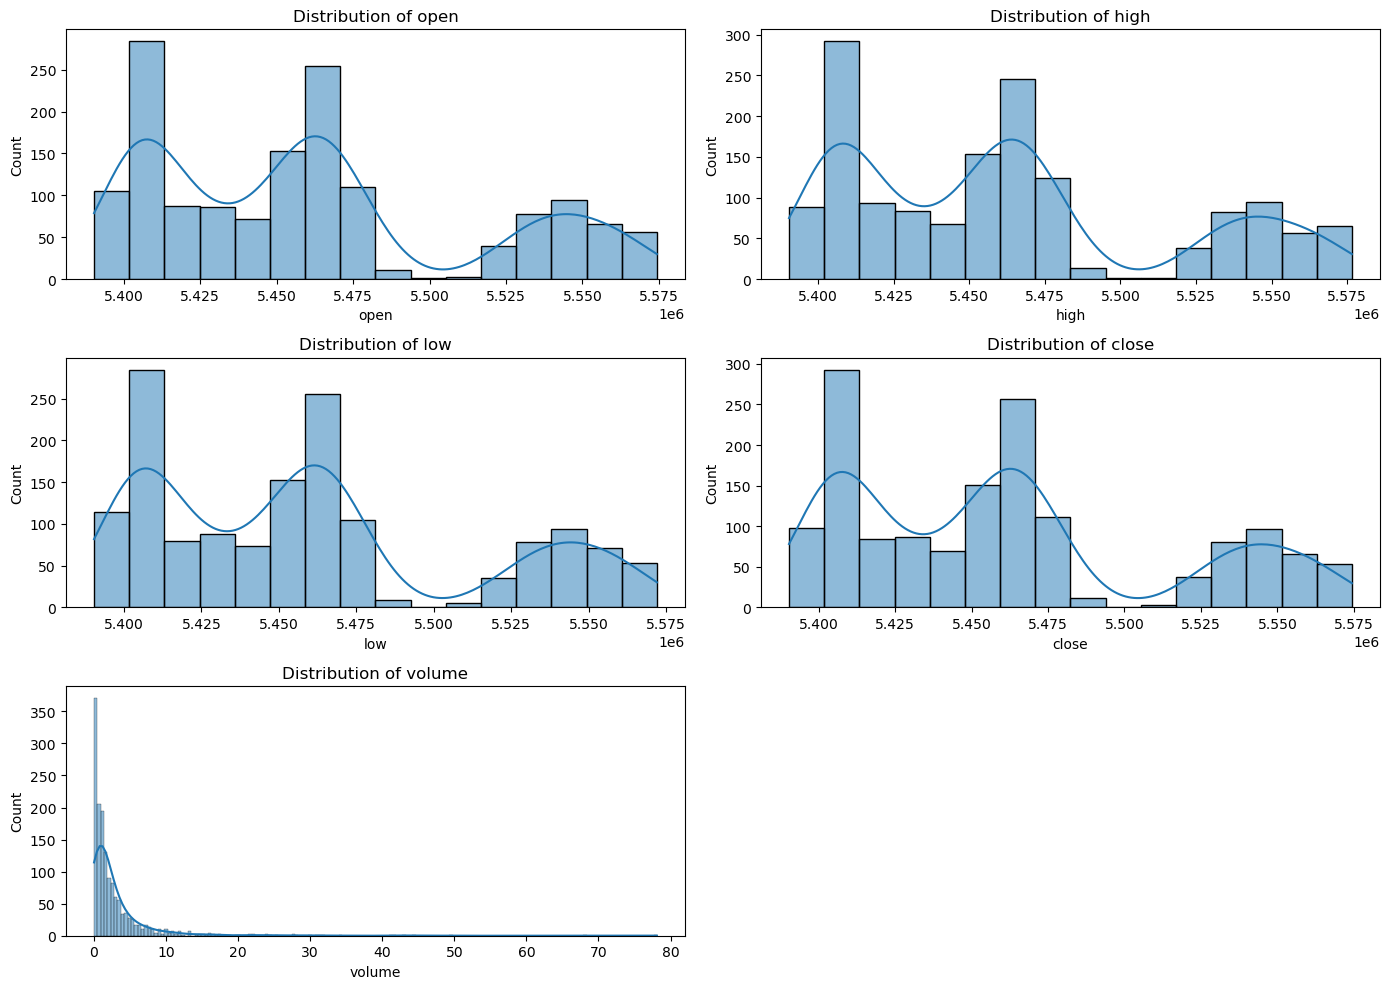

In [326]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plots
plt.figure(figsize=(14,10))
for i, column in enumerate(['open', 'high', 'low', 'close', 'volume']):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[column].astype('float'), kde=True)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()


In [327]:
import plotly.graph_objects as go
import plotly.subplots as sp

fig = sp.make_subplots(rows=5, cols=1, subplot_titles=("Close", "Open", "High", "Low", "Volume"))

fig.add_trace(go.Box(y=df['close'], name='Close', marker_color='blue'), row=1, col=1)
fig.add_trace(go.Box(y=df['open'], name='Open', marker_color='green'), row=2, col=1)
fig.add_trace(go.Box(y=df['high'], name='High', marker_color='orange'), row=3, col=1)
fig.add_trace(go.Box(y=df['low'], name='Low', marker_color='red'), row=4, col=1)
fig.add_trace(go.Box(y=df['volume'], name='Volume', marker_color='purple'), row=5, col=1)

fig.update_layout(
    height=1200,  # Adjust the height to fit all subplots
    title_text="Box Plots for Close, Open, High, Low, and Volume",
    showlegend=False
)

fig.show()


In [328]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=2, subplot_titles=('Open Price', 'High Price', 'Low Price', 'Close Price', 'Volume'))

# Plot 'Open' prices
fig.add_trace(
    go.Scatter(x=df['startTime'], y=df['open'].astype(float), mode='lines', name='Open Price'),
    row=1, col=1
)

# Plot 'High' prices
fig.add_trace(
    go.Scatter(x=df['startTime'], y=df['high'].astype(float), mode='lines', name='High Price', line=dict(color='green')),
    row=1, col=2
)

# Plot 'Low' prices
fig.add_trace(
    go.Scatter(x=df['startTime'], y=df['low'].astype(float), mode='lines', name='Low Price', line=dict(color='red')),
    row=2, col=1
)

# Plot 'Close' prices
fig.add_trace(
    go.Scatter(x=df['startTime'], y=df['close'].astype(float), mode='lines', name='Close Price', line=dict(color='purple')),
    row=2, col=2
)

# Plot 'Volume'
fig.add_trace(
    go.Scatter(x=df['startTime'], y=df['volume'].astype(float), mode='lines', name='Volume', line=dict(color='orange')),
    row=3, col=1
)

fig.update_layout(
    height=800,
    title_text='BTCINR Price and Volume Over Time',
    xaxis_title="Time",
    yaxis_title="Price (INR)",
)

fig.show()


In [329]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Calculate 10-period and 30-period Simple Moving Average (SMA)
df['SMA_10'] = df['close'].rolling(window=10).mean()
df['SMA_30'] = df['close'].rolling(window=30).mean()

# Calculate 10-period Exponential Moving Average (EMA)
df['EMA_10'] = df['close'].ewm(span=10, adjust=False).mean()

# Create a subplot
fig = make_subplots(rows=1, cols=1)

# Add close price
fig.add_trace(
    go.Scatter(x=df['startTime'], y=df['close'].astype(float), mode='lines', name='Close Price', opacity=0.5)
)

# Add 10-period SMA
fig.add_trace(
    go.Scatter(x=df['startTime'], y=df['SMA_10'], mode='lines', name='10-period SMA', line=dict(color='red'))
)

# Add 30-period SMA
fig.add_trace(
    go.Scatter(x=df['startTime'], y=df['SMA_30'], mode='lines', name='30-period SMA', line=dict(color='green'))
)

# Add 10-period EMA
fig.add_trace(
    go.Scatter(x=df['startTime'], y=df['EMA_10'], mode='lines', name='10-period EMA', line=dict(color='purple'))
)

fig.update_layout(
    title="BTCINR Close Price with 10-period/30-period SMA and 10-period EMA",
    xaxis_title="Time",
    yaxis_title="Price (INR)",
    height=600,
)

fig.show()


In [331]:
import numpy as np
import plotly.graph_objs as go

# Calculate daily returns
df['returns'] = df['close'].astype(float).pct_change()

# Volatility (Standard Deviation of returns)
df['volatility'] = df['returns'].rolling(window=10).std()

fig = go.Figure()

# Plot the volatility
fig.add_trace(
    go.Scatter(
        x=df['startTime'],
        y=df['volatility'],
        mode='lines',
        name='Volatility (10-period rolling std)',
        line=dict(color='orange')
    )
)

fig.update_layout(
    title="BTCINR Volatility Over Time",
    xaxis_title="Time",
    yaxis_title="Volatility",
    height=600
)

fig.show()


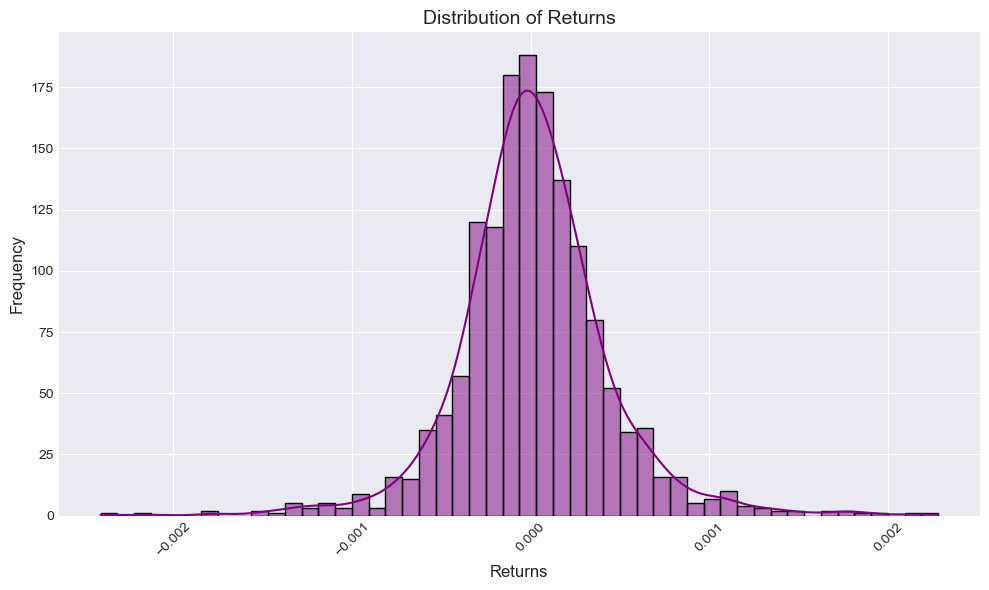

In [395]:
plt.figure(figsize=(10, 6))
sns.histplot(df['returns'], kde=True, bins=50, color='purple')
set_plot_labels('Distribution of Returns', 'Returns', 'Frequency')
plt.show()

In [332]:
import plotly.graph_objs as go

# RSI
delta = df['close'].astype(float).diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

# MACD
ema_12 = df['close'].astype(float).ewm(span=12, adjust=False).mean()
ema_26 = df['close'].astype(float).ewm(span=26, adjust=False).mean()
df['MACD'] = ema_12 - ema_26
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Plot RSI
fig_rsi = go.Figure()

# Add RSI line
fig_rsi.add_trace(
    go.Scatter(
        x=df['startTime'],
        y=df['RSI'],
        mode='lines',
        name='RSI',
        line=dict(color='blue')
    )
)

# Add oversold and overbought thresholds
fig_rsi.add_trace(
    go.Scatter(
        x=df['startTime'],
        y=[30]*len(df),
        mode='lines',
        name='Oversold Threshold',
        line=dict(color='red', dash='dash')
    )
)

fig_rsi.add_trace(
    go.Scatter(
        x=df['startTime'],
        y=[70]*len(df),
        mode='lines',
        name='Overbought Threshold',
        line=dict(color='green', dash='dash')
    )
)

fig_rsi.update_layout(
    title="BTCINR Relative Strength Index (RSI)",
    xaxis_title="Time",
    yaxis_title="RSI",
    height=600
)

fig_rsi.show()

# Plot MACD
fig_macd = go.Figure()

# Add MACD line
fig_macd.add_trace(
    go.Scatter(
        x=df['startTime'],
        y=df['MACD'],
        mode='lines',
        name='MACD',
        line=dict(color='purple')
    )
)

# Add Signal Line
fig_macd.add_trace(
    go.Scatter(
        x=df['startTime'],
        y=df['Signal_Line'],
        mode='lines',
        name='Signal Line',
        line=dict(color='orange')
    )
)

# Update layout for MACD plot
fig_macd.update_layout(
    title="BTCINR MACD and Signal Line",
    xaxis_title="Time",
    yaxis_title="MACD Value",
    height=600
)

fig_macd.show()


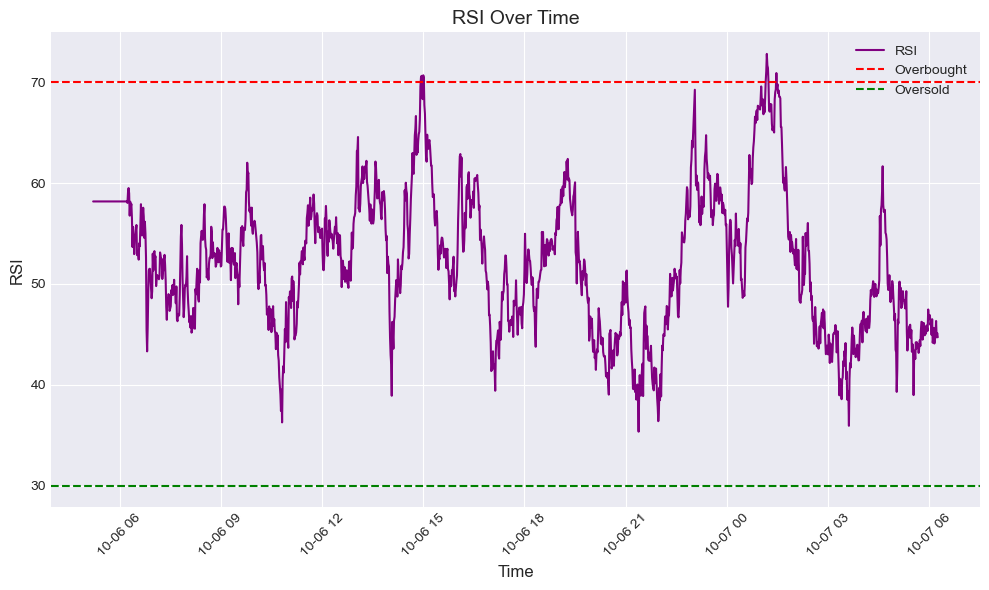

In [393]:
plt.figure(figsize=(10, 6))
plt.plot(df['startTime'], df['RSI'], label='RSI', color='purple')
set_plot_labels('RSI Over Time', 'Time', 'RSI')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.legend()
plt.show()

In [404]:
import plotly.graph_objs as go

# Extract the hour from the 'startTime' column and create a new 'hour' column
df['hour'] = df['startTime'].dt.hour

# Group data by hour of the day to detect patterns
hourly_data = df.groupby('hour')['close'].mean()

# Create a Plotly figure
fig_hourly = go.Figure()

# Add the average close price line plot
fig_hourly.add_trace(
    go.Scatter(
        x=hourly_data.index,
        y=hourly_data.values,
        mode='lines+markers',
        name='Average Close Price',
        line=dict(color='blue'),
        marker=dict(size=8)
    )
)

# Update layout for the plot
fig_hourly.update_layout(
    title="Average Close Price by Hour of the Day",
    xaxis_title="Hour of the Day",
    yaxis_title="Average Close Price",
    xaxis=dict(tickmode='linear'),  # Ensure all hour ticks are shown
    height=600
)

# Show the plot
fig_hourly.show()


In [334]:
from scipy import stats
import plotly.graph_objs as go

# Z-score for anomaly detection
df['z_score'] = stats.zscore(df['close'].astype(float))

# Detect anomalies where z-score is greater than 3 or less than -3
anomalies = df[(df['z_score'] > 3) | (df['z_score'] < -3)]

# Create a Plotly figure
fig_anomalies = go.Figure()

# Add the close price line plot
fig_anomalies.add_trace(
    go.Scatter(
        x=df['startTime'],
        y=df['close'].astype(float),
        mode='lines',
        name='Close Price',
        line=dict(color='blue')
    )
)

# Add anomalies as scatter points
fig_anomalies.add_trace(
    go.Scatter(
        x=anomalies['startTime'],
        y=anomalies['close'].astype(float),
        mode='markers',
        name='Anomalies',
        marker=dict(color='red', size=8)
    )
)

# Update layout for the plot
fig_anomalies.update_layout(
    title="Anomalies in Close Price",
    xaxis_title="Time",
    yaxis_title="Close Price (INR)",
    height=600
)

# Show the plot
fig_anomalies.show()


In [335]:
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert the 'close' column to numeric
df['close'] = pd.to_numeric(df['close'], errors='coerce')

# Ensure the DataFrame is sorted by startTime
df = df.sort_values('startTime')

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['close'], model='additive', period=60)  # period=60 for 1-minute data

# Extract the decomposed components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Create a Plotly figure for Trend
fig_trend = go.Figure()
fig_trend.add_trace(go.Scatter(x=df['startTime'], y=trend, mode='lines', name='Trend'))
fig_trend.update_layout(
    title='Trend Component of 1-Minute Close Prices',
    xaxis_title='Time',
    yaxis_title='Trend',
    height=600
)

# Show the Trend plot
fig_trend.show()

# Create a Plotly figure for Seasonal
fig_seasonal = go.Figure()
fig_seasonal.add_trace(go.Scatter(x=df['startTime'], y=seasonal, mode='lines', name='Seasonal'))
fig_seasonal.update_layout(
    title='Seasonal Component of 1-Minute Close Prices',
    xaxis_title='Time',
    yaxis_title='Seasonal',
    height=600
)

# Show the Seasonal plot
fig_seasonal.show()

# Create a Plotly figure for Residual
fig_residual = go.Figure()
fig_residual.add_trace(go.Scatter(x=df['startTime'], y=residual, mode='lines', name='Residual'))
fig_residual.update_layout(
    title='Residual Component of 1-Minute Close Prices',
    xaxis_title='Time',
    yaxis_title='Residual',
    height=600
)

# Show the Residual plot
fig_residual.show()


In [336]:
import pandas as pd
import plotly.graph_objects as go
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

# Ensure the 'startTime' is the index and the data is sorted
df.set_index('startTime', inplace=True)

# Calculate ACF and PACF
acf_values = acf(df['close'].astype(float), nlags=50)
pacf_values = pacf(df['close'].astype(float), nlags=50)

# Create ACF Plotly figure
acf_fig = go.Figure()
acf_fig.add_trace(go.Scatter(x=list(range(len(acf_values))), y=acf_values, mode='lines+markers', name='ACF'))
acf_fig.update_layout(title='Autocorrelation Function (ACF)',
                      xaxis_title='Lags',
                      yaxis_title='ACF',
                      height=400)

# Create PACF Plotly figure
pacf_fig = go.Figure()
pacf_fig.add_trace(go.Scatter(x=list(range(len(pacf_values))), y=pacf_values, mode='lines+markers', name='PACF'))
pacf_fig.update_layout(title='Partial Autocorrelation Function (PACF)',
                       xaxis_title='Lags',
                       yaxis_title='PACF',
                       height=400)

# Show the plots
acf_fig.show()
pacf_fig.show()


In [389]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(14, 8))

# Basic settings for all plots
def set_plot_labels(title, xlabel, ylabel):
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()

C:\Users\bhave\AppData\Local\Temp\ipykernel_35940\1248200952.py:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



<Figure size 1400x800 with 0 Axes>

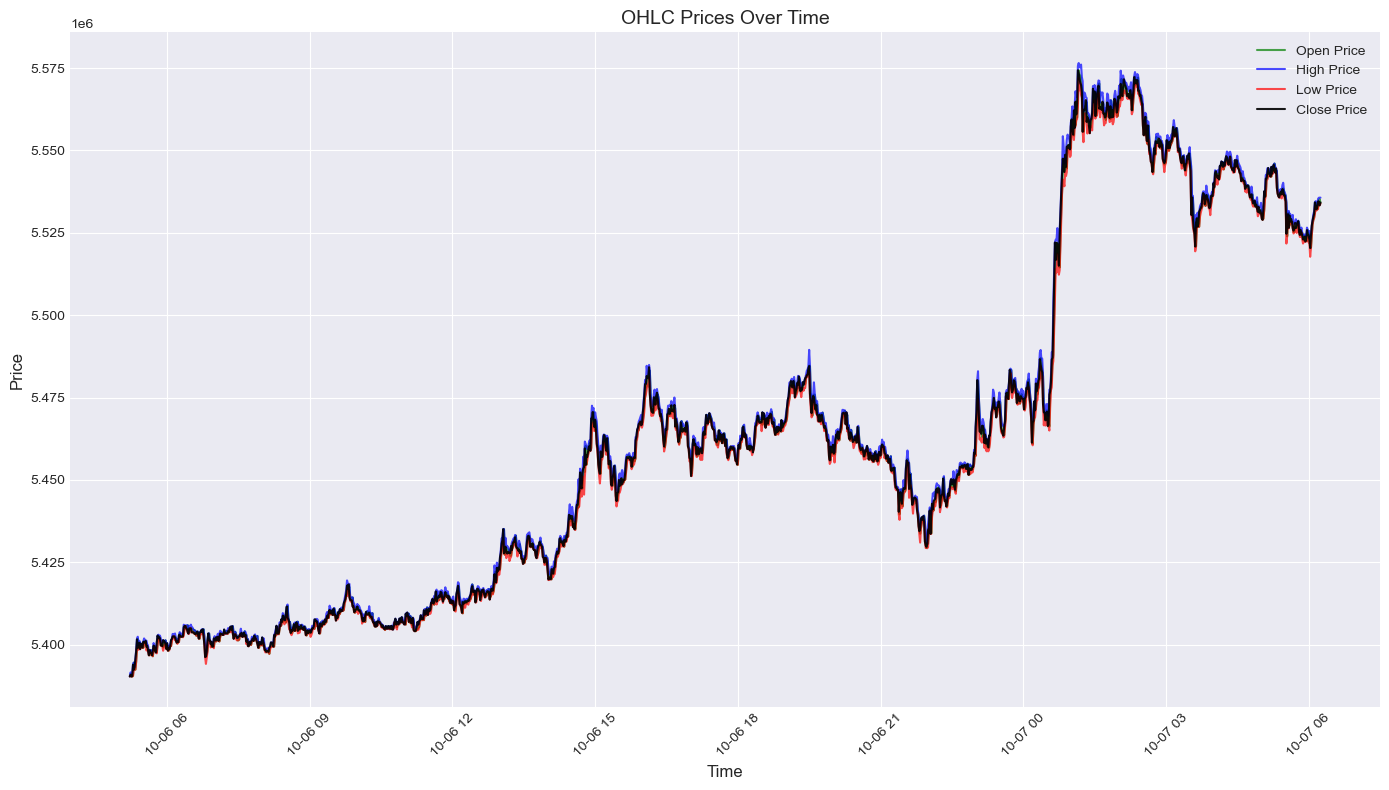

In [390]:
plt.figure(figsize=(14, 8))
plt.plot(df['startTime'], df['open'], label='Open Price', color='green', alpha=0.7)
plt.plot(df['startTime'], df['high'], label='High Price', color='blue', alpha=0.7)
plt.plot(df['startTime'], df['low'], label='Low Price', color='red', alpha=0.7)
plt.plot(df['startTime'], df['close'], label='Close Price', color='black', alpha=0.9)
set_plot_labels('OHLC Prices Over Time', 'Time', 'Price')
plt.legend()
plt.show()

# Feature Engineering

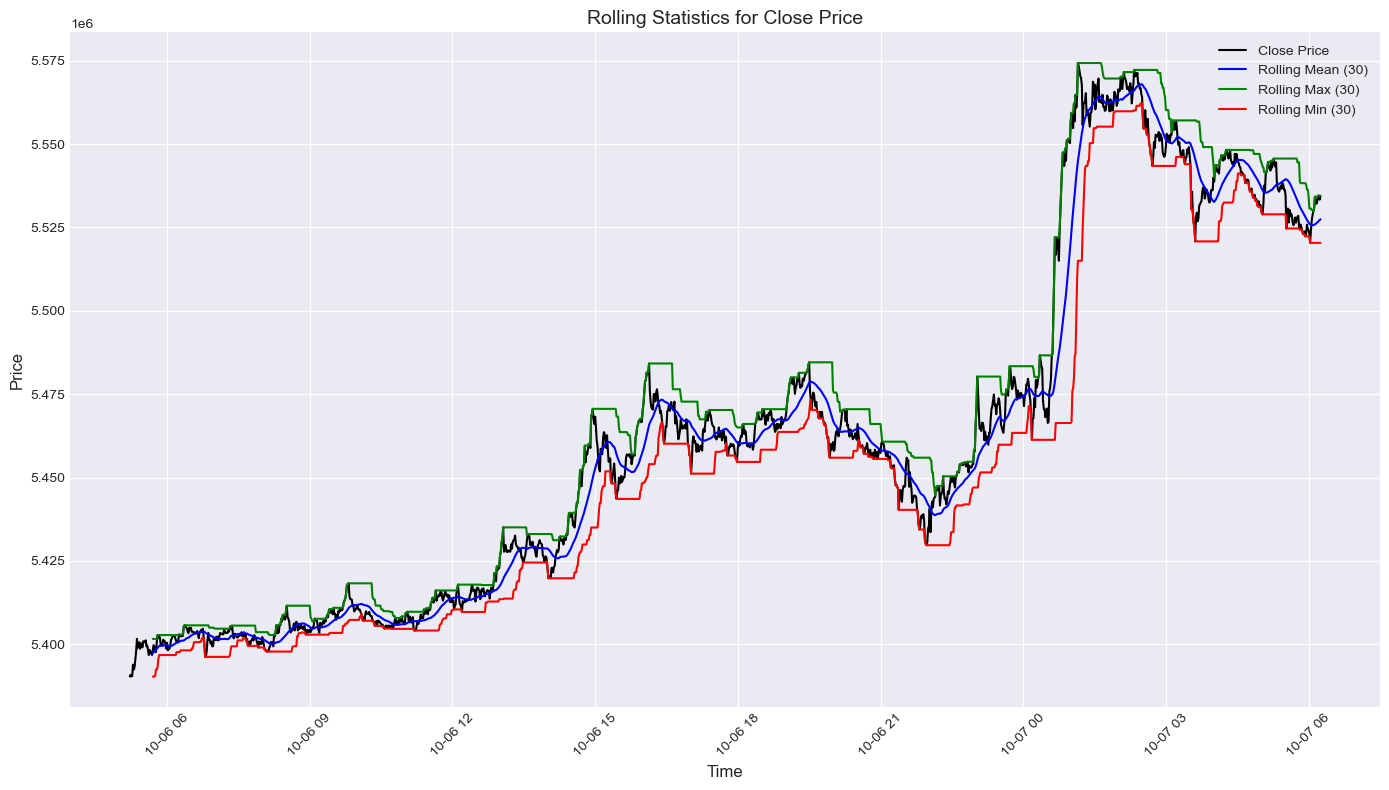

In [391]:
# Rolling Statistics for Close Price
df['rolling_mean_30'] = df['close'].rolling(window=30).mean()
df['rolling_max_30'] = df['close'].rolling(window=30).max()
df['rolling_min_30'] = df['close'].rolling(window=30).min()

plt.figure(figsize=(14, 8))
plt.plot(df['startTime'], df['close'], label='Close Price', color='black')
plt.plot(df['startTime'], df['rolling_mean_30'], label='Rolling Mean (30)', color='blue')
plt.plot(df['startTime'], df['rolling_max_30'], label='Rolling Max (30)', color='green')
plt.plot(df['startTime'], df['rolling_min_30'], label='Rolling Min (30)', color='red')
set_plot_labels('Rolling Statistics for Close Price', 'Time', 'Price')
plt.legend()
plt.show()

In [330]:
# 1. Average True Range (ATR)
def compute_atr(df, period=14):
    df['TR'] = np.maximum(df['high'] - df['low'], 
                          np.maximum(abs(df['high'] - df['close'].shift(1)), 
                                     abs(df['low'] - df['close'].shift(1))))
    df['ATR'] = df['TR'].rolling(window=period).mean()
    return df

# 2. Average Directional Movement Index (ADX)
def compute_adx(df, period=14):
    df['+DM'] = np.where((df['high'] - df['high'].shift(1)) > (df['low'].shift(1) - df['low']), 
                         np.maximum(df['high'] - df['high'].shift(1), 0), 0)
    df['-DM'] = np.where((df['low'].shift(1) - df['low']) > (df['high'] - df['high'].shift(1)), 
                         np.maximum(df['low'].shift(1) - df['low'], 0), 0)
    df['TR'] = np.maximum(df['high'] - df['low'], 
                          np.maximum(abs(df['high'] - df['close'].shift(1)), 
                                     abs(df['low'] - df['close'].shift(1))))
    df['ATR'] = df['TR'].rolling(window=period).mean()
    df['+DI'] = 100 * (df['+DM'].rolling(window=period).mean() / df['ATR'])
    df['-DI'] = 100 * (df['-DM'].rolling(window=period).mean() / df['ATR'])
    df['DX'] = 100 * abs(df['+DI'] - df['-DI']) / (df['+DI'] + df['-DI'])
    df['ADX'] = df['DX'].rolling(window=period).mean()
    return df

# 3. Commodity Channel Index (CCI)
def compute_cci(df, period=20):
    df['TP'] = (df['high'] + df['low'] + df['close']) / 3  # Typical Price
    df['SMA_TP'] = df['TP'].rolling(window=period).mean()
    df['MAD'] = df['TP'].rolling(window=period).apply(lambda x: np.mean(np.abs(x - np.mean(x))), raw=True)
    df['CCI'] = (df['TP'] - df['SMA_TP']) / (0.015 * df['MAD'])
    return df

# 4. Price Rate-of-Change (ROC)
def compute_roc(df, period=14):
    df['ROC'] = ((df['close'] - df['close'].shift(period)) / df['close'].shift(period)) * 100
    return df

# 5. William’s %R
def compute_williams_r(df, period=14):
    df['Highest_High'] = df['high'].rolling(window=period).max()
    df['Lowest_Low'] = df['low'].rolling(window=period).min()
    df['Williams_%R'] = (df['Highest_High'] - df['close']) / (df['Highest_High'] - df['Lowest_Low']) * -100
    return df

# 6. Stochastic %K
def compute_stochastic_k(df, period=14):
    df['Lowest_Low'] = df['low'].rolling(window=period).min()
    df['Highest_High'] = df['high'].rolling(window=period).max()
    df['Stoch_%K'] = (df['close'] - df['Lowest_Low']) / (df['Highest_High'] - df['Lowest_Low']) * 100
    return df

# 7. Stochastic %D (SMA of %K)
def compute_stochastic_d(df, period=3):
    df['Stoch_%D'] = df['Stoch_%K'].rolling(window=period).mean()
    return df

# Apply all calculations to the dataframe
df = compute_atr(df)
df = compute_adx(df)
df = compute_cci(df)
df = compute_roc(df)
df = compute_williams_r(df)
df = compute_stochastic_k(df)
df = compute_stochastic_d(df)



In [403]:
import plotly.graph_objs as go

# Plot the ATR
atr_trace = go.Scatter(
    x=df['endTime'],
    y=df['ATR'],
    mode='lines',
    name='ATR'
)

layout = go.Layout(
    title='Average True Range (ATR) Over Time',
    xaxis=dict(title='Time'),
    yaxis=dict(title='ATR'),
)

fig = go.Figure(data=[atr_trace], layout=layout)
fig.show()


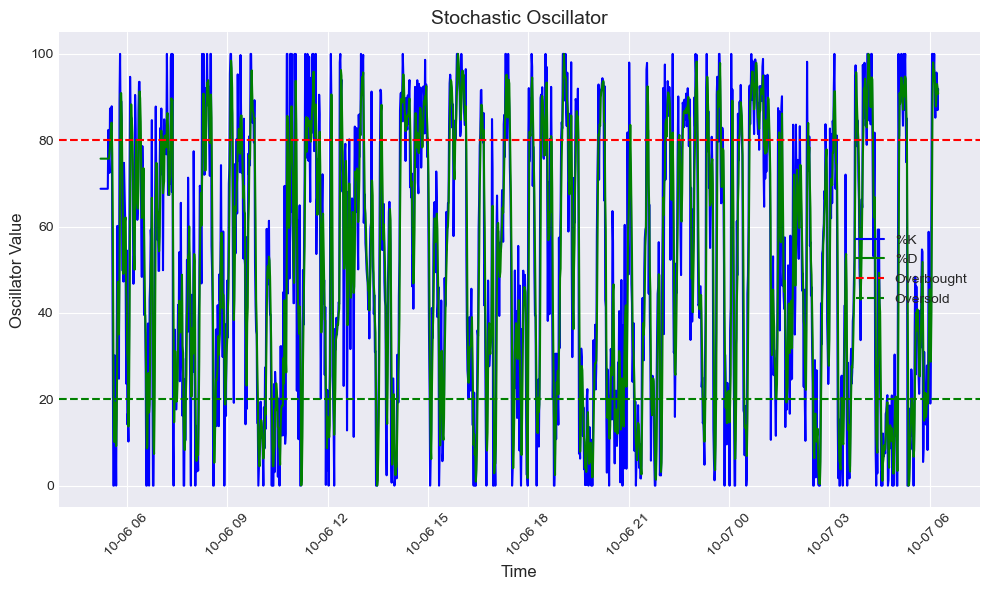

In [396]:
plt.figure(figsize=(10, 6))
plt.plot(df['startTime'], df['Stoch_%K'], label='%K', color='blue')
plt.plot(df['startTime'], df['Stoch_%D'], label='%D', color='green')
set_plot_labels('Stochastic Oscillator', 'Time', 'Oscillator Value')
plt.axhline(80, color='red', linestyle='--', label='Overbought')
plt.axhline(20, color='green', linestyle='--', label='Oversold')
plt.legend()
plt.show()

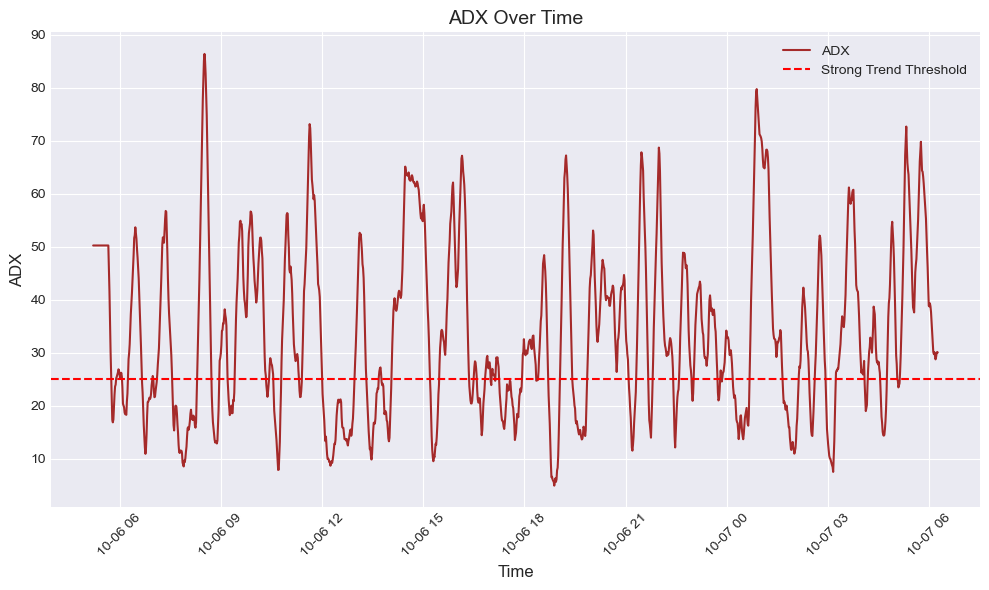

In [397]:
plt.figure(figsize=(10, 6))
plt.plot(df['startTime'], df['ADX'], label='ADX', color='brown')
set_plot_labels('ADX Over Time', 'Time', 'ADX')
plt.axhline(25, color='red', linestyle='--', label='Strong Trend Threshold')
plt.legend()
plt.show()

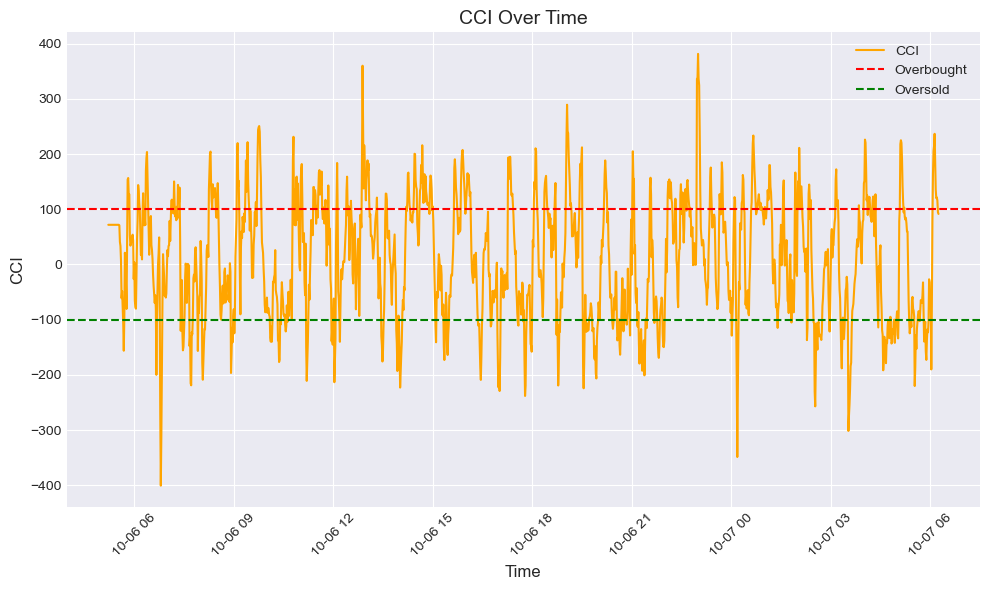

In [398]:
plt.figure(figsize=(10, 6))
plt.plot(df['startTime'], df['CCI'], label='CCI', color='orange')
set_plot_labels('CCI Over Time', 'Time', 'CCI')
plt.axhline(100, color='red', linestyle='--', label='Overbought')
plt.axhline(-100, color='green', linestyle='--', label='Oversold')
plt.legend()
plt.show()

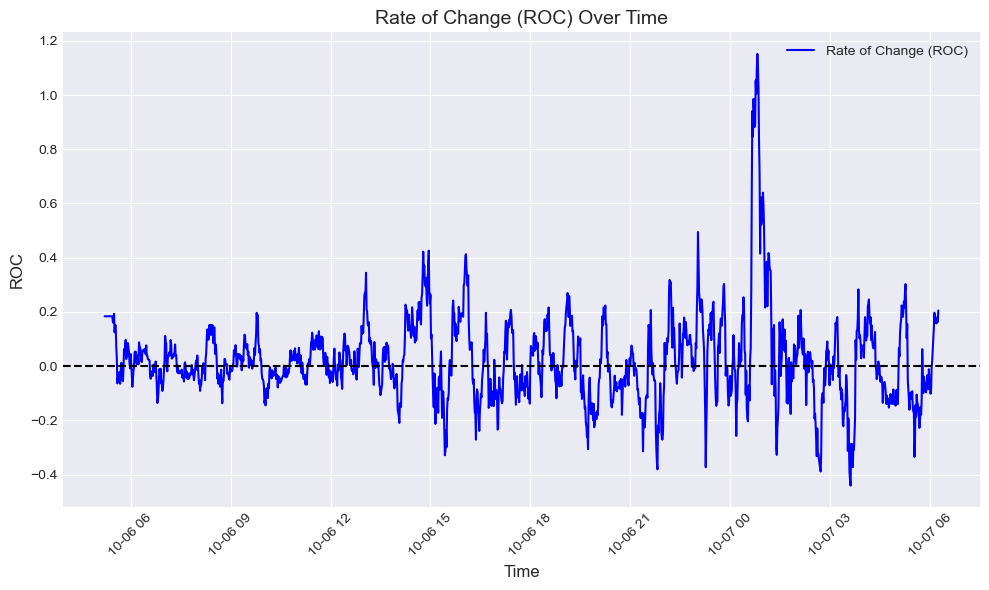

In [401]:
plt.figure(figsize=(10, 6))
plt.plot(df['startTime'], df['ROC'], label='Rate of Change (ROC)', color='blue')
set_plot_labels('Rate of Change (ROC) Over Time', 'Time', 'ROC')
plt.axhline(0, color='black', linestyle='--')
plt.legend()
plt.show()

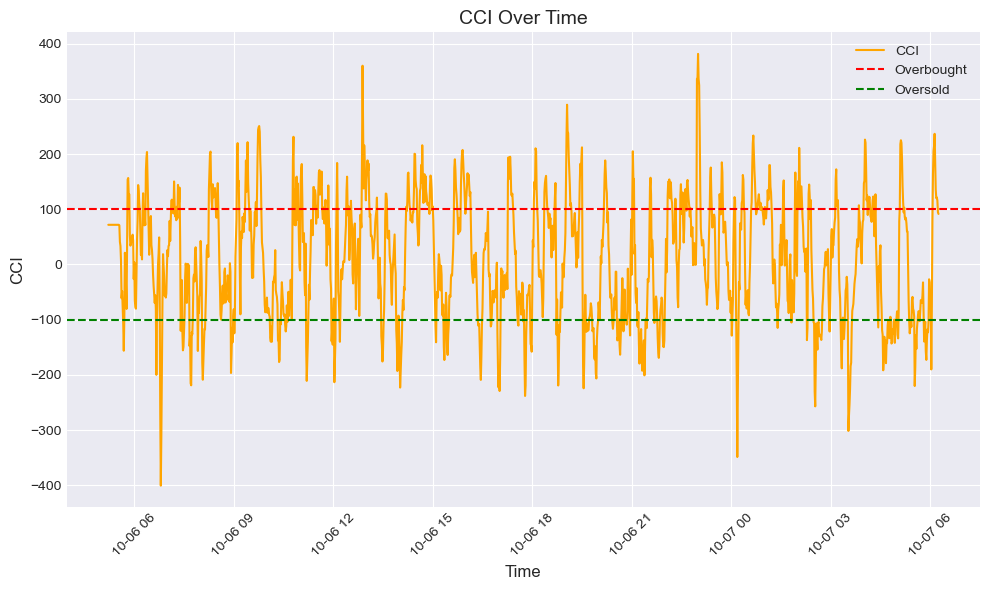

In [402]:
plt.figure(figsize=(10, 6))
plt.plot(df['startTime'], df['CCI'], label='CCI', color='orange')
set_plot_labels('CCI Over Time', 'Time', 'CCI')
plt.axhline(100, color='red', linestyle='--', label='Overbought')
plt.axhline(-100, color='green', linestyle='--', label='Oversold')
plt.legend()
plt.show()

In [272]:
columns_to_drop = ['TR', '+DM', '-DM', 'Highest_High', 'Lowest_Low', 'SMA_TP', 'MAD']
df = df.drop(columns=columns_to_drop, errors='ignore')

In [274]:
df.columns

Index(['startTime', 'open', 'high', 'low', 'close', 'endTime', 'volume',
       'hour', 'day', 'day_of_week', 'month', 'SMA_10', 'SMA_30', 'EMA_10',
       'ATR', '+DI', '-DI', 'DX', 'ADX', 'TP', 'CCI', 'ROC', 'Williams_%R',
       'Stoch_%K', 'Stoch_%D'],
      dtype='object')

In [337]:
# Lag features
df['prev_close'] = df['close'].astype(float).shift(1)
df['prev_volume'] = df['volume'].astype(float).shift(1)
for lag in [1, 60]:
    df[f'close_lag_{lag}'] = df['close'].astype(float).shift(lag)


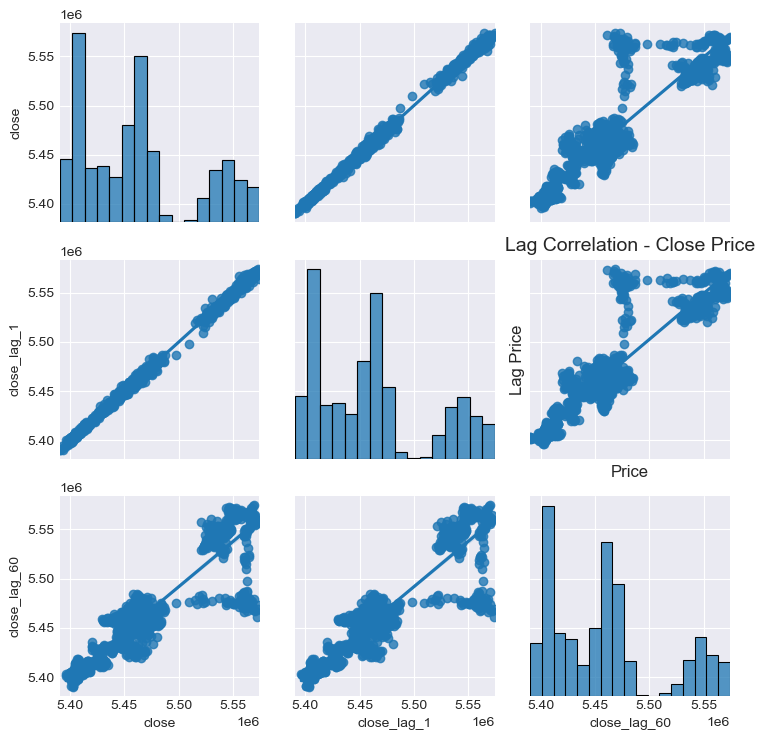

In [399]:
df['close_lag_1'] = df['close'].shift(1)
df['close_lag_60'] = df['close'].shift(60)
sns.pairplot(df[['close', 'close_lag_1', 'close_lag_60']], kind='reg')
set_plot_labels('Lag Correlation - Close Price', 'Price', 'Lag Price')
plt.show()

In [338]:
# Moving Averages
df['SMA_5'] = df['close'].astype(float).rolling(window=5).mean()
df['SMA_10'] = df['close'].astype(float).rolling(window=10).mean()
df['EMA_5'] = df['close'].astype(float).ewm(span=5, adjust=False).mean()
df['EMA_10'] = df['close'].astype(float).ewm(span=10, adjust=False).mean()

# Rolling Volatility
df['rolling_volatility'] = df['returns'].rolling(window=10).std()

# Rolling Maximum/Minimum
df['rolling_max'] = df['close'].astype(float).rolling(window=10).max()
df['rolling_min'] = df['close'].astype(float).rolling(window=10).min()


In [339]:
# RSI Calculation
delta = df['close'].astype(float).diff()
gain = (delta.where(delta > 0, 0)).rolling(window=60).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=60).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

# MACD Calculation
ema_12 = df['close'].astype(float).ewm(span=12, adjust=False).mean()
ema_26 = df['close'].astype(float).ewm(span=26, adjust=False).mean()
df['MACD'] = ema_12 - ema_26
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Bollinger Bands
df['Bollinger_High'] = df['SMA_10'] + (df['rolling_volatility'] * 2)
df['Bollinger_Low'] = df['SMA_10'] - (df['rolling_volatility'] * 2)


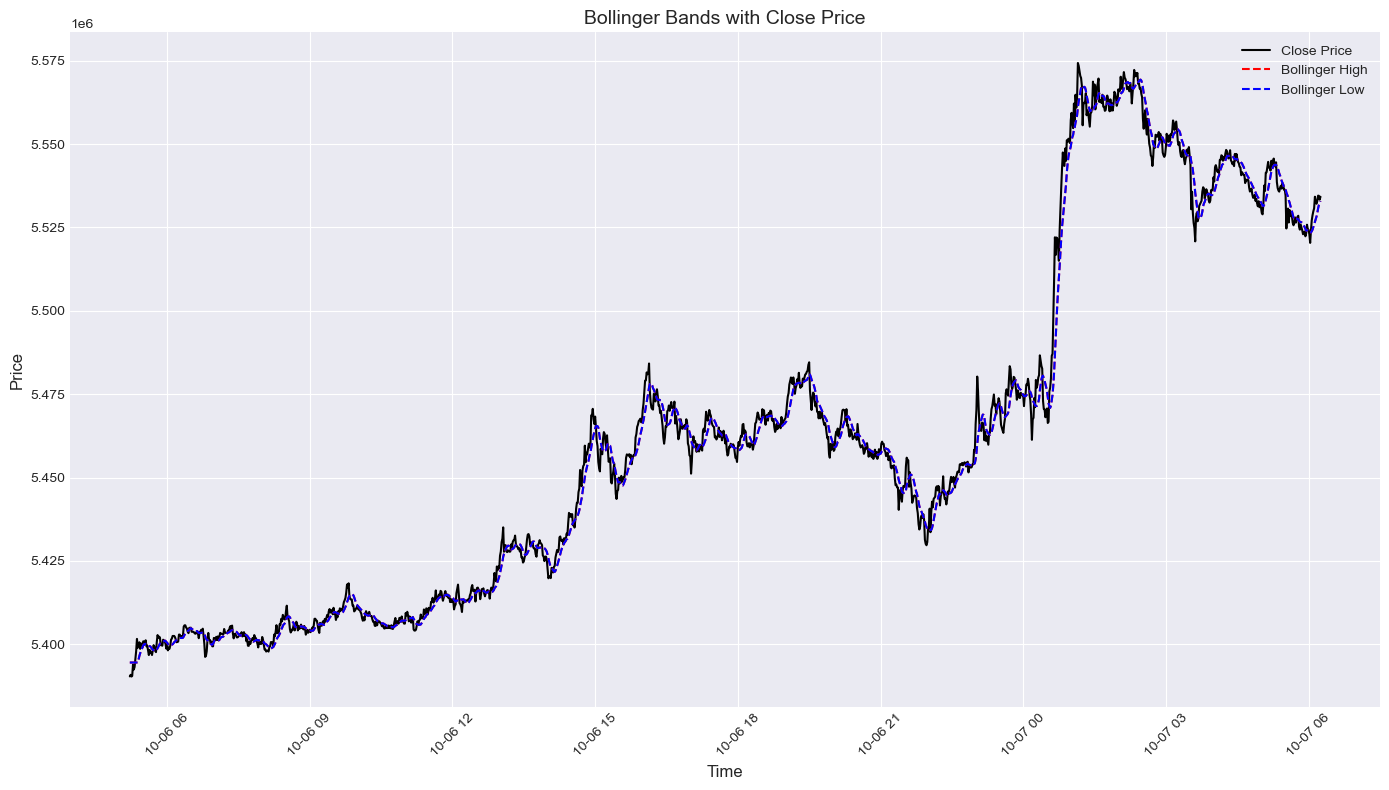

In [394]:
plt.figure(figsize=(14, 8))
plt.plot(df['startTime'], df['close'], label='Close Price', color='black')
plt.plot(df['startTime'], df['Bollinger_High'], label='Bollinger High', color='red', linestyle='--')
plt.plot(df['startTime'], df['Bollinger_Low'], label='Bollinger Low', color='blue', linestyle='--')
set_plot_labels('Bollinger Bands with Close Price', 'Time', 'Price')
plt.legend()
plt.show()

In [340]:
# Target variable: 1 if price increases in next period, else 0
df['target'] = np.where(df['close'].astype(float).shift(-1) > df['close'].astype(float), 1, 0)


In [285]:
df

open       high        low      close  \
startTime                                                         
2024-10-06 03:48:00  5395623.0  5396896.0  5394873.0  5395684.0   
2024-10-06 03:49:00  5396442.0  5397689.0  5395387.0  5397689.0   
2024-10-06 03:50:00  5397890.0  5397890.0  5396085.0  5396085.0   
2024-10-06 03:51:00  5395422.0  5396181.0  5395422.0  5396181.0   
2024-10-06 03:52:00  5395387.0  5396486.0  5395387.0  5395727.0   
...                        ...        ...        ...        ...   
2024-10-07 04:46:00  5536826.0  5537750.0  5535648.0  5535770.0   
2024-10-07 04:47:00  5535613.0  5536529.0  5535082.0  5536180.0   
2024-10-07 04:48:00  5535422.0  5539023.0  5535422.0  5536677.0   
2024-10-07 04:49:00  5536677.0  5537174.0  5533739.0  5534951.0   
2024-10-07 04:50:00  5535134.0  5535134.0  5532989.0  5533913.0   

                                    endTime  volume  hour  day  day_of_week  \
startTime                                                                     
2024-10-06 03:48:00 2024-10-06 03:48:59.999   0.466     3    6            6   
2024-10-06 03:49:00 2024-10-06 03:49:59.999   0.966     3    6            6   
2024-10-06 03:50:00 2024-10-06 03:50:59.999   0.135     3    6            6   
2024-10-06 03:51:00 2024-10-06 03:51:59.999   0.005     3    6            6   
2024-10-06 03:52:00 2024-10-06 03:52:59.999   0.069     3    6            6   
...                                     ...     ...   ...  ...          ...   
2024-10-07 04:46:00 2024-10-07 04:46:59.999   1.331     4    7            0   
2024-10-07 04:47:00 2024-10-07 04:47:59.999   1.757     4    7            0   
2024-10-07 04:48:00 2024-10-07 04:48:59.999   5.039     4    7            0   
2024-10-07 04:49:00 2024-10-07 04:49:59.999   2.938     4    7            0   
2024-10-07 04:50:00 2024-10-07 04:50:59.999   1.627     4    7            0   

                     month  ...  close_lag_1  close_lag_60      SMA_5  \
startTime                   ...                                         
2024-10-06 03:48:00     10  ...          NaN           NaN        NaN   
2024-10-06 03:49:00     10  ...    5395684.0           NaN        NaN   
2024-10-06 03:50:00     10  ...    5397689.0           NaN        NaN   
2024-10-06 03:51:00     10  ...    5396085.0           NaN        NaN   
2024-10-06 03:52:00     10  ...    5396181.0           NaN  5396273.2   
...                    ...  ...          ...           ...        ...   
2024-10-07 04:46:00     10  ...    5537000.0     5535779.0  5538081.0   
2024-10-07 04:47:00     10  ...    5535770.0     5537061.0  5537496.8   
2024-10-07 04:48:00     10  ...    5536180.0     5536651.0  5536954.4   
2024-10-07 04:49:00     10  ...    5536677.0     5533686.0  5536115.6   
2024-10-07 04:50:00     10  ...    5534951.0     5534733.0  5535498.2   

                            EMA_5  rolling_volatility  rolling_max  \
startTime                                                            
2024-10-06 03:48:00  5.395684e+06                 NaN          NaN   
2024-10-06 03:49:00  5.396352e+06                 NaN          NaN   
2024-10-06 03:50:00  5.396263e+06                 NaN          NaN   
2024-10-06 03:51:00  5.396236e+06                 NaN          NaN   
2024-10-06 03:52:00  5.396066e+06                 NaN          NaN   
...                           ...                 ...          ...   
2024-10-07 04:46:00  5.537675e+06            0.000189    5541177.0   
2024-10-07 04:47:00  5.537177e+06            0.000198    5540741.0   
2024-10-07 04:48:00  5.537010e+06            0.000206    5540706.0   
2024-10-07 04:49:00  5.536324e+06            0.000217    5539389.0   
2024-10-07 04:50:00  5.535520e+06            0.000189    5539389.0   

                     rolling_min  Bollinger_High  Bollinger_Low  target  
startTime                                                                
2024-10-06 03:48:00          NaN             NaN            NaN       1  
2024-10-06 03:49:00          NaN           

In [341]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller


df['close'] = pd.to_numeric(df['close'], errors='coerce')

# Drop any rows with NaN values in the 'close' column
df = df.dropna(subset=['close'])

# ADF test
adft = adfuller(df['close'], autolag='AIC')

output_df = pd.DataFrame({
    "Values": [adft[0], adft[1], adft[2], adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']],
    "Metric": ["Test Statistics", "p-value", "No. of lags used", "Number of observations used", 
               "Critical value (1%)", "Critical value (5%)", "Critical value (10%)"]
})

print(output_df)


        Values                       Metric
0    -0.911561              Test Statistics
1     0.784141                      p-value
2     3.000000             No. of lags used
3  1496.000000  Number of observations used
4    -3.434729          Critical value (1%)
5    -2.863474          Critical value (5%)
6    -2.567800         Critical value (10%)


In [342]:
dff = df.copy()

In [288]:
df.columns

Index(['open', 'high', 'low', 'close', 'endTime', 'volume', 'hour', 'day',
       'day_of_week', 'month', 'SMA_10', 'SMA_30', 'EMA_10', 'ATR', '+DI',
       '-DI', 'DX', 'ADX', 'TP', 'CCI', 'ROC', 'Williams_%R', 'Stoch_%K',
       'Stoch_%D', 'returns', 'volatility', 'RSI', 'MACD', 'Signal_Line',
       'z_score', 'prev_close', 'prev_volume', 'close_lag_1', 'close_lag_60',
       'SMA_5', 'EMA_5', 'rolling_volatility', 'rolling_max', 'rolling_min',
       'Bollinger_High', 'Bollinger_Low', 'target'],
      dtype='object')

In [289]:
df.month.unique()

array([10], dtype=int64)

In [343]:
df.drop('month',axis=1,inplace=True)

In [291]:
import plotly.figure_factory as ff

corr = df.corr()

# heatmap 
fig = ff.create_annotated_heatmap(
    z=corr.values,
    x=corr.columns.tolist(),
    y=corr.columns.tolist(),
    annotation_text=corr.round(2).values,
    colorscale='RdBu',
)


fig.update_layout(
    title="Correlation Matrix",
    xaxis_title="Features",
    yaxis_title="Features",
)

fig.show()

C:\Users\bhave\AppData\Local\Temp\ipykernel_35940\2113021117.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [293]:
df.drop(columns= ['open','high','low','prev_close','close_lag_1','SMA_5','EMA_5','rolling_max','rolling_min','Bollinger_High','Bollinger_Low','close_lag_60'],inplace=True)

In [294]:
df.drop(columns= ['SMA_10','SMA_30','EMA_10'],inplace=True)

In [345]:
df.drop(columns= ['Signal_Line','day_of_week'],inplace=True)

In [344]:
df.drop(columns= ['TP','z_score'],inplace=True)

In [300]:
df.drop(columns= ['Stoch_%K',
       'Stoch_%D'],inplace=True)

In [302]:
df.drop(columns= ['rolling_volatility','CCI','volatility'],inplace=True)

In [304]:
df.drop(columns= ['ROC'],inplace=True)

In [305]:
corr = df.corr()

fig = ff.create_annotated_heatmap(
    z=corr.values,
    x=corr.columns.tolist(),
    y=corr.columns.tolist(),
    annotation_text=corr.round(2).values,
    colorscale='RdBu',
)

fig.update_layout(
    title="Correlation Matrix",
    xaxis_title="Features",
    yaxis_title="Features",
)

fig.show()

C:\Users\bhave\AppData\Local\Temp\ipykernel_35940\961623227.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [423]:
df.fillna(method='bfill', inplace=True)

In [430]:
df.to_csv(r"C:\Users\bhave\Downloads\pi42.csv")

In [307]:
df.close

startTime
2024-10-06 03:48:00    5395684.0
2024-10-06 03:49:00    5397689.0
2024-10-06 03:50:00    5396085.0
2024-10-06 03:51:00    5396181.0
2024-10-06 03:52:00    5395727.0
                         ...    
2024-10-07 04:46:00    5535770.0
2024-10-07 04:47:00    5536180.0
2024-10-07 04:48:00    5536677.0
2024-10-07 04:49:00    5534951.0
2024-10-07 04:50:00    5533913.0
Name: close, Length: 1500, dtype: float64

# ARIMA

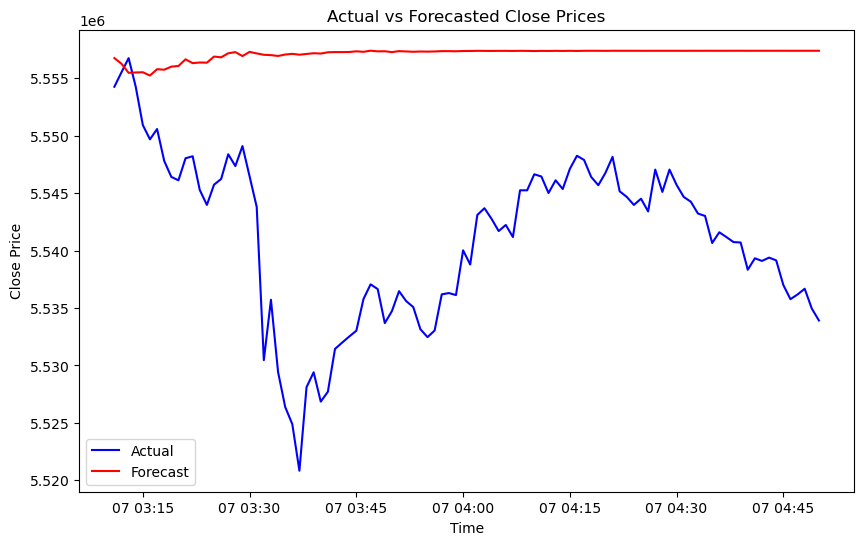

In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler



# Split the data
train_data = df['close'][:1400].values.reshape(-1, 1)
test_data = df['close'][1400:1500].values.reshape(-1, 1)

# Scale the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

# Fit ARIMA model on scaled training data (p=30, d=1, q=1)
model = ARIMA(train_scaled, order=(30, 1, 1))
model_fit = model.fit()

# Forecast for the next 100 steps (test data length)
forecast_scaled = model_fit.forecast(steps=100)

# Inverse transform the scaled forecast back to original values
forecast = scaler.inverse_transform(forecast_scaled.reshape(-1, 1))

# Plot the actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df.index[1400:1500], test_data, label="Actual", color='blue')
plt.plot(df.index[1400:1500], forecast, label="Forecast", color='red')
plt.title('Actual vs Forecasted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


# LSTM

In [347]:
df.columns

Index(['open', 'high', 'low', 'close', 'endTime', 'volume', 'hour', 'day',
       'SMA_10', 'SMA_30', 'EMA_10', 'TR', 'ATR', '+DM', '-DM', '+DI', '-DI',
       'DX', 'ADX', 'SMA_TP', 'MAD', 'CCI', 'ROC', 'Highest_High',
       'Lowest_Low', 'Williams_%R', 'Stoch_%K', 'Stoch_%D', 'returns',
       'volatility', 'RSI', 'MACD', 'prev_close', 'prev_volume', 'close_lag_1',
       'close_lag_60', 'SMA_5', 'EMA_5', 'rolling_volatility', 'rolling_max',
       'rolling_min', 'Bollinger_High', 'Bollinger_Low', 'target'],
      dtype='object')

In [310]:
df

close                 endTime  volume  hour  day  \
startTime                                                                   
2024-10-06 03:48:00  5395684.0 2024-10-06 03:48:59.999   0.466     3    6   
2024-10-06 03:49:00  5397689.0 2024-10-06 03:49:59.999   0.966     3    6   
2024-10-06 03:50:00  5396085.0 2024-10-06 03:50:59.999   0.135     3    6   
2024-10-06 03:51:00  5396181.0 2024-10-06 03:51:59.999   0.005     3    6   
2024-10-06 03:52:00  5395727.0 2024-10-06 03:52:59.999   0.069     3    6   
...                        ...                     ...     ...   ...  ...   
2024-10-07 04:46:00  5535770.0 2024-10-07 04:46:59.999   1.331     4    7   
2024-10-07 04:47:00  5536180.0 2024-10-07 04:47:59.999   1.757     4    7   
2024-10-07 04:48:00  5536677.0 2024-10-07 04:48:59.999   5.039     4    7   
2024-10-07 04:49:00  5534951.0 2024-10-07 04:49:59.999   2.938     4    7   
2024-10-07 04:50:00  5533913.0 2024-10-07 04:50:59.999   1.627     4    7   

                             ATR        +DI        -DI         DX        ADX  \
startTime                                                                      
2024-10-06 03:48:00  1590.785714  29.127565  15.428135  30.746750  17.335058   
2024-10-06 03:49:00  1590.785714  29.127565  15.428135  30.746750  17.335058   
2024-10-06 03:50:00  1590.785714  29.127565  15.428135  30.746750  17.335058   
2024-10-06 03:51:00  1590.785714  29.127565  15.428135  30.746750  17.335058   
2024-10-06 03:52:00  1590.785714  29.127565  15.428135  30.746750  17.335058   
...                          ...        ...        ...        ...        ...   
2024-10-07 04:46:00  2047.928571   5.350354  39.206864  75.984344  32.063155   
2024-10-07 04:47:00  1994.357143   5.494073  38.601769  75.081222  36.755699   
2024-10-07 04:48:00  2100.857143  13.695090  35.162519  43.938761  39.349457   
2024-10-07 04:49:00  2130.714286  13.503185  33.178009  42.147217  40.340957   
2024-10-07 04:50:00  2163.714286  13.297240  35.147894  45.103918  42.821946   

                     Williams_%R   returns        RSI         MACD  \
startTime                                                            
2024-10-06 03:48:00   -21.669937  0.000372  46.118771     0.000000   
2024-10-06 03:49:00   -21.669937  0.000372  46.118771   159.943020   
2024-10-06 03:50:00   -21.669937 -0.000297  46.118771   155.477374   
2024-10-06 03:51:00   -21.669937  0.000018  46.118771   157.864947   
2024-10-06 03:52:00   -21.669937 -0.000084  46.118771   121.719997   
...                          ...       ...        ...          ...   
2024-10-07 04:46:00   -98.751918 -0.000222  49.994003 -1741.563545   
2024-10-07 04:47:00   -88.816460  0.000074  49.406022 -1868.846214   
2024-10-07 04:48:00   -81.447016  0.000090  50.017509 -1907.624986   
2024-10-07 04:49:00   -87.806841 -0.000312  50.866332 -2053.954508   
2024-10-07 04:50:00   -91.356408 -0.000188  49.438356 -2227.996676   

                     prev_volume  target  
startTime                                 
2024-10-06 03:48:00        0.466       1  
2024-10-06 03:49:00        0.466       0  
2024-10-06 03:50:00        0.966       1  
2024-10-06 03:51:00        0.135       0  
2024-10-06 03:52:00        0.005       1  
...                          ...     ...  
2024-10-07 04:46:00        2.137       1  
2024-10-07 04:47:00        1.331       1  
2024-10-07 04:48:00        1.757       0  
2024-10-07 04:49:00        5.039       0  
2024-10-07 04:50:00        2.938       0  

[1500 rows x 16 columns]

Epoch 1/20
44/44 [==============================] - 11s 94ms/step - loss: 0.0239 - val_loss: 0.0099
Epoch 2/20
44/44 [==============================] - 3s 61ms/step - loss: 0.0054 - val_loss: 0.0014
Epoch 3/20
44/44 [==============================] - 2s 57ms/step - loss: 0.0038 - val_loss: 8.3754e-04
Epoch 4/20
44/44 [==============================] - 3s 63ms/step - loss: 0.0034 - val_loss: 3.1126e-04
Epoch 5/20
44/44 [==============================] - 3s 59ms/step - loss: 0.0033 - val_loss: 0.0015
Epoch 6/20
44/44 [==============================] - 3s 59ms/step - loss: 0.0027 - val_loss: 0.0036
Epoch 7/20
44/44 [==============================] - 3s 59ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 8/20
44/44 [==============================] - 2s 57ms/step - loss: 0.0025 - val_loss: 7.3154e-04
Epoch 9/20
44/44 [==============================] - 3s 57ms/step - loss: 0.0022 - val_loss: 2.9544e-04
Epoch 10/20
44/44 [==============================] - 2s 57ms/step - loss: 0.0024 - val_loss:

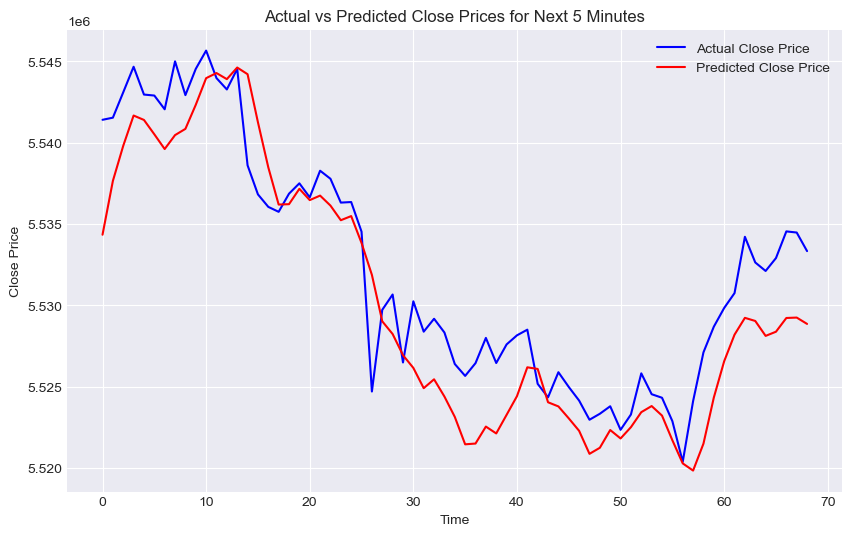

In [424]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt


# Extract the features for the model
features = ['open', 'high', 'low', 'close', 'volume', 'hour', 'day',
       'SMA_10', 'SMA_30', 'EMA_10', 'TR', 'ATR', '+DM', '-DM', '+DI', '-DI',
       'DX', 'ADX', 'SMA_TP', 'MAD', 'CCI', 'ROC', 'Highest_High',
       'Lowest_Low', 'Williams_%R', 'Stoch_%K', 'Stoch_%D', 'returns',
       'volatility', 'RSI', 'MACD', 'prev_close', 'prev_volume', 'close_lag_1',
       'close_lag_60', 'SMA_5', 'EMA_5', 'rolling_volatility', 'rolling_max',
       'rolling_min', 'Bollinger_High', 'Bollinger_Low', 'target']
df_features = df[features]

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_features)

# Convert to DataFrame for easier handling
scaled_df = pd.DataFrame(scaled_data, columns=features)

# Set time window settings
input_timesteps = 30  # 30 minutes input
output_timesteps = 1  # 5 minutes prediction

# Prepare input-output pairs
X, y = [], []

# Create input sequences (30 timesteps) and corresponding output sequences (next 5 timesteps close price)
for i in range(len(scaled_df) - input_timesteps - output_timesteps):
    X.append(scaled_df.iloc[i:i + input_timesteps].values)   # Input: 30 timesteps of features
    y.append(scaled_df['close'].iloc[i + input_timesteps:i + input_timesteps + output_timesteps].values)  # Output: 5 future close prices

X, y = np.array(X), np.array(y)

# Train-test split (use first 1400 rows for training)
train_size = 1400
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# LSTM model
model = Sequential()

# First LSTM layer with Dropout regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output layer: predicting 1 future close prices
model.add(Dense(output_timesteps))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


predicted = model.predict(X_test)

predicted_close = scaler.inverse_transform(np.concatenate([predicted, np.zeros((predicted.shape[0], len(features) - 1))], axis=1))[:, 0]
actual_close = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0] * output_timesteps, len(features) - 1))], axis=1))[:, 0]

# Plot the first 100 actual vs predicted close prices for visual comparison
plt.figure(figsize=(10, 6))
plt.plot(actual_close[:100], color='blue', label='Actual Close Price')
plt.plot(predicted_close[:100], color='red', label='Predicted Close Price')
plt.title('Actual vs Predicted Close Prices for Next 5 Minutes')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [419]:
X.shape

(1409, 30, 43)

## Backtesting

Final Profit: ₹181.87167662958382
Total Return: 0.18%


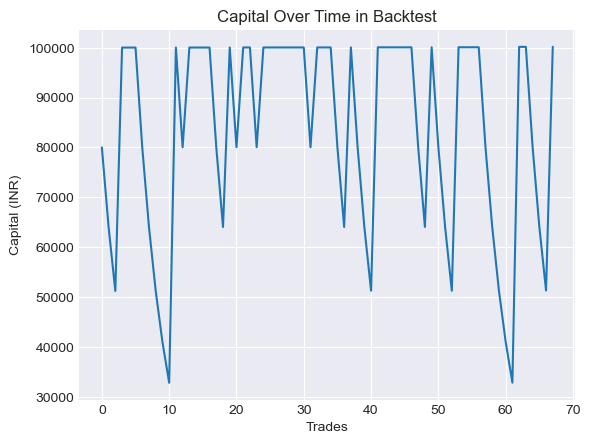

In [434]:
import numpy as np
import matplotlib.pyplot as plt

# Initial setup
initial_capital = 100000  # Starting capital in INR
capital = initial_capital
holding = 0  # No initial holding of BTC
investment_fraction = 0.2  # Fraction of capital used for each trade
transaction_log = []

# Price delta threshold for holding
price_delta = 0.00001  # 1% change to trigger a buy/sell decision

# Buy and Sell strategy
for i in range(len(predicted_close) - 1):
    actual = actual_close[i]
    predicted = predicted_close[i + 1]

    # If prediction is higher than actual and price change is greater than delta, Buy
    if predicted > predicted_close[i] and capital > 0 and (predicted - predicted_close[i]) / predicted > price_delta:
        # Buy fraction of BTC with available capital
        amount_to_invest = capital * investment_fraction
        btc_bought = amount_to_invest / actual
        holding += btc_bought
        capital -= amount_to_invest
        transaction_log.append({'action': 'buy', 'price': actual, 'btc_bought': btc_bought, 'capital': capital})

    # If prediction is lower than actual and price change is greater than delta, Sell
    elif predicted < predicted_close[i] and holding > 0 and (predicted_close[i] - predicted) / predicted > price_delta:
        # Sell all holding
        capital += holding * actual
        transaction_log.append({'action': 'sell', 'price': actual, 'btc_sold': holding, 'capital': capital})
        holding = 0  # Reset holding after selling

    # If price change is within the delta, Hold
    else:
        transaction_log.append({'action': 'hold', 'price': actual, 'capital': capital})

# Final capital if all BTC were sold at the last price
if holding > 0:
    capital += holding * actual_close[-1]

# Calculate profit and return
final_profit = capital - initial_capital
total_return = (capital / initial_capital - 1) * 100

print(f"Final Profit: ₹{final_profit}")
print(f"Total Return: {total_return:.2f}%")

# Optional: Plot capital over time
capital_over_time = [log['capital'] for log in transaction_log]
plt.plot(capital_over_time)
plt.title("Capital Over Time in Backtest")
plt.xlabel("Trades")
plt.ylabel("Capital (INR)")
plt.show()


In [436]:
import pandas as pd
import plotly.graph_objects as go

# Extracting transaction logs into a DataFrame
transaction_df = pd.DataFrame(transaction_log)

# Adding an index for trades
transaction_df['trade_number'] = transaction_df.index + 1

# Create a Plotly figure
fig = go.Figure()

# Plotting capital over time
fig.add_trace(go.Scatter(
    x=transaction_df['trade_number'],
    y=transaction_df['capital'],
    mode='lines+markers',
    name='Capital',
    line=dict(color='blue'),
))

# Highlight Buy actions
buy_trades = transaction_df[transaction_df['action'] == 'buy']
fig.add_trace(go.Scatter(
    x=buy_trades['trade_number'],
    y=buy_trades['capital'],
    mode='markers',
    name='Buy',
    marker=dict(symbol='triangle-up', size=10, color='green'),
))

# Highlight Sell actions
sell_trades = transaction_df[transaction_df['action'] == 'sell']
fig.add_trace(go.Scatter(
    x=sell_trades['trade_number'],
    y=sell_trades['capital'],
    mode='markers',
    name='Sell',
    marker=dict(symbol='triangle-down', size=10, color='red'),
))

# Highlight Hold actions
hold_trades = transaction_df[transaction_df['action'] == 'hold']
fig.add_trace(go.Scatter(
    x=hold_trades['trade_number'],
    y=hold_trades['capital'],
    mode='markers',
    name='Hold',
    marker=dict(symbol='circle', size=5, color='gray'),
))

# Update layout
fig.update_layout(
    title="Capital Over Time in Backtest with Buy, Sell, and Hold Actions",
    xaxis_title="Trade Number",
    yaxis_title="Capital (INR)",
    xaxis=dict(tickvals=list(range(0, len(transaction_df), 10))),
    template='plotly_white',
)

# Show the figure
fig.show()

# Create a second figure for Actual vs Predicted Close Price
fig2 = go.Figure()

# Plot Actual Close Price
fig2.add_trace(go.Scatter(
    x=transaction_df['trade_number'],
    y=actual_close[:len(transaction_df)],
    mode='lines',
    name='Actual Close Price',
    line=dict(color='purple'),
))

# Plot Predicted Close Price
fig2.add_trace(go.Scatter(
    x=transaction_df['trade_number'],
    y=predicted_close[:len(transaction_df)],
    mode='lines',
    name='Predicted Close Price',
    line=dict(color='orange'),
))

# Update layout for the second figure
fig2.update_layout(
    title="Actual vs Predicted Close Price",
    xaxis_title="Trade Number",
    yaxis_title="Price (INR)",
    template='plotly_white',
)

# Show the second figure
fig2.show()

# Create a third figure for Capital Over Time
fig3 = go.Figure()

# Plot Capital Over Time
fig3.add_trace(go.Scatter(
    x=transaction_df['trade_number'],
    y=transaction_df['capital'],
    mode='lines+markers',
    name='Capital',
    line=dict(color='blue'),
))

# Update layout for the third figure
fig3.update_layout(
    title="Capital Over Time with Buy and Sell Transactions",
    xaxis_title="Trade Number",
    yaxis_title="Capital (INR)",
    template='plotly_white',
)

# Show the third figure
fig3.show()


# Bidirectional LSTM

In [441]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

# Build the Bidirectional LSTM model
model = Sequential()

# Bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Another Bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=50)))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(output_timesteps))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
44/44 [==============================] - 21s 179ms/step - loss: 0.0122 - val_loss: 0.0018
Epoch 2/20
44/44 [==============================] - 5s 106ms/step - loss: 0.0035 - val_loss: 6.0189e-04
Epoch 3/20
44/44 [==============================] - 5s 107ms/step - loss: 0.0029 - val_loss: 6.0504e-04
Epoch 4/20
44/44 [==============================] - 5s 110ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 5/20
44/44 [==============================] - 5s 116ms/step - loss: 0.0020 - val_loss: 2.6173e-04
Epoch 6/20
44/44 [==============================] - 5s 107ms/step - loss: 0.0021 - val_loss: 2.0560e-04
Epoch 7/20
44/44 [==============================] - 5s 111ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 8/20
44/44 [==============================] - 5s 108ms/step - loss: 0.0018 - val_loss: 6.1037e-04
Epoch 9/20
44/44 [==============================] - 5s 103ms/step - loss: 0.0016 - val_loss: 1.8780e-04
Epoch 10/20
44/44 [==============================] - 5s 107ms/step - loss: 

3/3 [==============================] - 3s 22ms/step


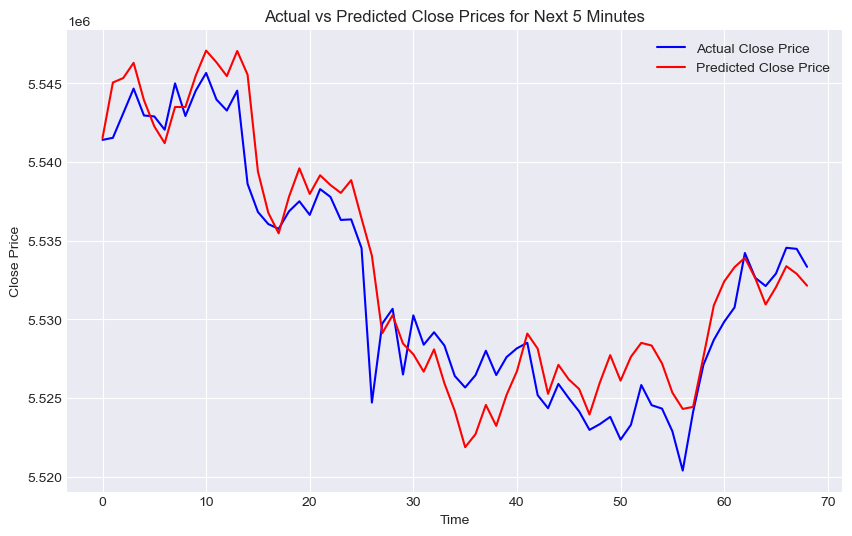

In [442]:
# Make predictions on the test set
predicted = model.predict(X_test)

predicted_close = scaler.inverse_transform(np.concatenate([predicted, np.zeros((predicted.shape[0], len(features) - 1))], axis=1))[:, 0]
actual_close = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0] * output_timesteps, len(features) - 1))], axis=1))[:, 0]

plt.figure(figsize=(10, 6))
plt.plot(actual_close[:100], color='blue', label='Actual Close Price')
plt.plot(predicted_close[:100], color='red', label='Predicted Close Price')
plt.title('Actual vs Predicted Close Prices for Next 5 Minutes')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Final Profit: ₹257.37580073217396
Total Return: 0.26%


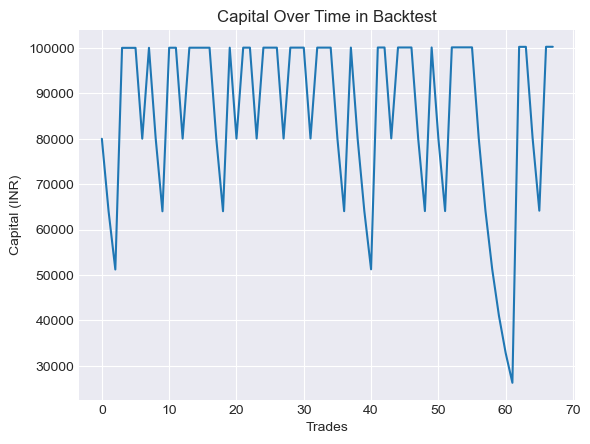

In [443]:
import numpy as np
import matplotlib.pyplot as plt

# Initial setup
initial_capital = 100000  # Starting capital in INR
capital = initial_capital
holding = 0  # No initial holding of BTC
investment_fraction = 0.2  # Fraction of capital used for each trade
transaction_log = []

# Price delta threshold for holding
price_delta = 0.0000001
# Buy and Sell strategy
for i in range(len(predicted_close) - 1):
    actual = actual_close[i]
    predicted = predicted_close[i + 1]

    # If prediction is higher than actual and price change is greater than delta, Buy
    if predicted > predicted_close[i] and capital > 0 and (predicted - predicted_close[i]) / predicted > price_delta:
        # Buy fraction of BTC with available capital
        amount_to_invest = capital * investment_fraction
        btc_bought = amount_to_invest / actual
        holding += btc_bought
        capital -= amount_to_invest
        transaction_log.append({'action': 'buy', 'price': actual, 'btc_bought': btc_bought, 'capital': capital})

    # If prediction is lower than actual and price change is greater than delta, Sell
    elif predicted < predicted_close[i] and holding > 0 and (predicted_close[i] - predicted) / predicted > price_delta:
        # Sell all holding
        capital += holding * actual
        transaction_log.append({'action': 'sell', 'price': actual, 'btc_sold': holding, 'capital': capital})
        holding = 0  # Reset holding after selling

    # If price change is within the delta, Hold
    else:
        transaction_log.append({'action': 'hold', 'price': actual, 'capital': capital})

# Final capital if all BTC were sold at the last price
if holding > 0:
    capital += holding * actual_close[-1]

# profit and return
final_profit = capital - initial_capital
total_return = (capital / initial_capital - 1) * 100

print(f"Final Profit: ₹{final_profit}")
print(f"Total Return: {total_return:.2f}%")

# capital over time
capital_over_time = [log['capital'] for log in transaction_log]
plt.plot(capital_over_time)
plt.title("Capital Over Time in Backtest")
plt.xlabel("Trades")
plt.ylabel("Capital (INR)")
plt.show()


In [444]:
import pandas as pd
import plotly.graph_objects as go

transaction_df = pd.DataFrame(transaction_log)

# index for trades
transaction_df['trade_number'] = transaction_df.index + 1

fig = go.Figure()

# capital over time
fig.add_trace(go.Scatter(
    x=transaction_df['trade_number'],
    y=transaction_df['capital'],
    mode='lines+markers',
    name='Capital',
    line=dict(color='blue'),
))

buy_trades = transaction_df[transaction_df['action'] == 'buy']
fig.add_trace(go.Scatter(
    x=buy_trades['trade_number'],
    y=buy_trades['capital'],
    mode='markers',
    name='Buy',
    marker=dict(symbol='triangle-up', size=10, color='green'),
))

sell_trades = transaction_df[transaction_df['action'] == 'sell']
fig.add_trace(go.Scatter(
    x=sell_trades['trade_number'],
    y=sell_trades['capital'],
    mode='markers',
    name='Sell',
    marker=dict(symbol='triangle-down', size=10, color='red'),
))

hold_trades = transaction_df[transaction_df['action'] == 'hold']
fig.add_trace(go.Scatter(
    x=hold_trades['trade_number'],
    y=hold_trades['capital'],
    mode='markers',
    name='Hold',
    marker=dict(symbol='circle', size=5, color='gray'),
))

fig.update_layout(
    title="Capital Over Time in Backtest with Buy, Sell, and Hold Actions",
    xaxis_title="Trade Number",
    yaxis_title="Capital (INR)",
    xaxis=dict(tickvals=list(range(0, len(transaction_df), 10))),
    template='plotly_white',
)

fig.show()

# second figure for Actual vs Predicted Close Price
fig2 = go.Figure()

# Actual Close Price
fig2.add_trace(go.Scatter(
    x=transaction_df['trade_number'],
    y=actual_close[:len(transaction_df)],
    mode='lines',
    name='Actual Close Price',
    line=dict(color='purple'),
))

# Predicted Close Price
fig2.add_trace(go.Scatter(
    x=transaction_df['trade_number'],
    y=predicted_close[:len(transaction_df)],
    mode='lines',
    name='Predicted Close Price',
    line=dict(color='orange'),
))
fig2.update_layout(
    title="Actual vs Predicted Close Price",
    xaxis_title="Trade Number",
    yaxis_title="Price (INR)",
    template='plotly_white',
)

fig2.show()

# third figure for Capital Over Time
fig3 = go.Figure()

# Plot Capital Over Time
fig3.add_trace(go.Scatter(
    x=transaction_df['trade_number'],
    y=transaction_df['capital'],
    mode='lines+markers',
    name='Capital',
    line=dict(color='blue'),
))

fig3.update_layout(
    title="Capital Over Time with Buy and Sell Transactions",
    xaxis_title="Trade Number",
    yaxis_title="Capital (INR)",
    template='plotly_white',
)

fig3.show()


# LSTM + Attention

In [358]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Attention, Concatenate

def build_attention_lstm(input_shape, output_timesteps):
    inputs = Input(shape=input_shape)
    
    # LSTM layer
    lstm_out = LSTM(units=50, return_sequences=True)(inputs)
    lstm_out = Dropout(0.2)(lstm_out)
    
    # Attention layer
    attention = Attention()([lstm_out, lstm_out])
    attention = Dropout(0.2)(attention)
    
    # LSTM layer after attention
    lstm_out = LSTM(units=50)(attention)
    lstm_out = Dropout(0.2)(lstm_out)
    
    # Output layer
    outputs = Dense(output_timesteps)(lstm_out)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

model = build_attention_lstm((X_train.shape[1], X_train.shape[2]), output_timesteps)

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
44/44 [==============================] - 42s 237ms/step - loss: 0.0223 - val_loss: 0.0016
Epoch 2/20
44/44 [==============================] - 4s 99ms/step - loss: 0.0049 - val_loss: 0.0015
Epoch 3/20
44/44 [==============================] - 5s 110ms/step - loss: 0.0045 - val_loss: 0.0026
Epoch 4/20
44/44 [==============================] - 4s 101ms/step - loss: 0.0043 - val_loss: 0.0045
Epoch 5/20
44/44 [==============================] - 5s 104ms/step - loss: 0.0041 - val_loss: 0.0013
Epoch 6/20
44/44 [==============================] - 4s 102ms/step - loss: 0.0036 - val_loss: 0.0013
Epoch 7/20
44/44 [==============================] - 4s 98ms/step - loss: 0.0033 - val_loss: 0.0012
Epoch 8/20
44/44 [==============================] - 4s 96ms/step - loss: 0.0031 - val_loss: 0.0012
Epoch 9/20
44/44 [==============================] - 4s 98ms/step - loss: 0.0025 - val_loss: 0.0015
Epoch 10/20
44/44 [==============================] - 4s 96ms/step - loss: 0.0025 - val_loss: 0.0015
Epo

3/3 [==============================] - 6s 23ms/step


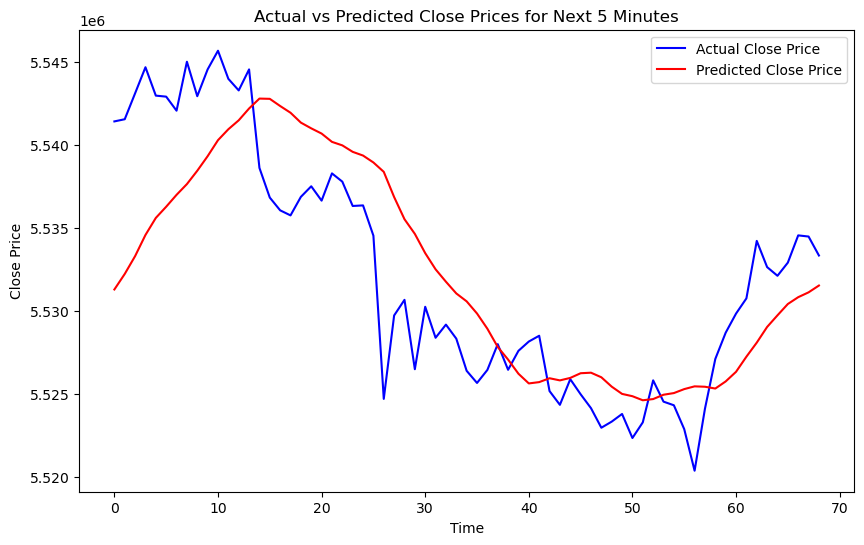

In [359]:
predicted = model.predict(X_test)

predicted_close = scaler.inverse_transform(np.concatenate([predicted, np.zeros((predicted.shape[0], len(features) - 1))], axis=1))[:, 0]
actual_close = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0] * output_timesteps, len(features) - 1))], axis=1))[:, 0]
plt.figure(figsize=(10, 6))
plt.plot(actual_close[:100], color='blue', label='Actual Close Price')
plt.plot(predicted_close[:100], color='red', label='Predicted Close Price')
plt.title('Actual vs Predicted Close Prices for Next 5 Minutes')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# CNN+LSTM

In [361]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout

# CNN-LSTM model
model = Sequential()

# CNN layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Another LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(output_timesteps))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
44/44 [==============================] - 45s 263ms/step - loss: 0.0246 - val_loss: 0.0108
Epoch 2/20
44/44 [==============================] - 3s 67ms/step - loss: 0.0052 - val_loss: 0.0057
Epoch 3/20
44/44 [==============================] - 3s 67ms/step - loss: 0.0047 - val_loss: 0.0011
Epoch 4/20
44/44 [==============================] - 3s 59ms/step - loss: 0.0041 - val_loss: 0.0018
Epoch 5/20
44/44 [==============================] - 3s 62ms/step - loss: 0.0036 - val_loss: 8.7441e-04
Epoch 6/20
44/44 [==============================] - 3s 61ms/step - loss: 0.0032 - val_loss: 0.0024
Epoch 7/20
44/44 [==============================] - 3s 67ms/step - loss: 0.0029 - val_loss: 0.0016
Epoch 8/20
44/44 [==============================] - 3s 61ms/step - loss: 0.0025 - val_loss: 0.0045
Epoch 9/20
44/44 [==============================] - 3s 62ms/step - loss: 0.0026 - val_loss: 9.4014e-04
Epoch 10/20
44/44 [==============================] - 3s 65ms/step - loss: 0.0027 - val_loss: 7.5590

3/3 [==============================] - 8s 9ms/step


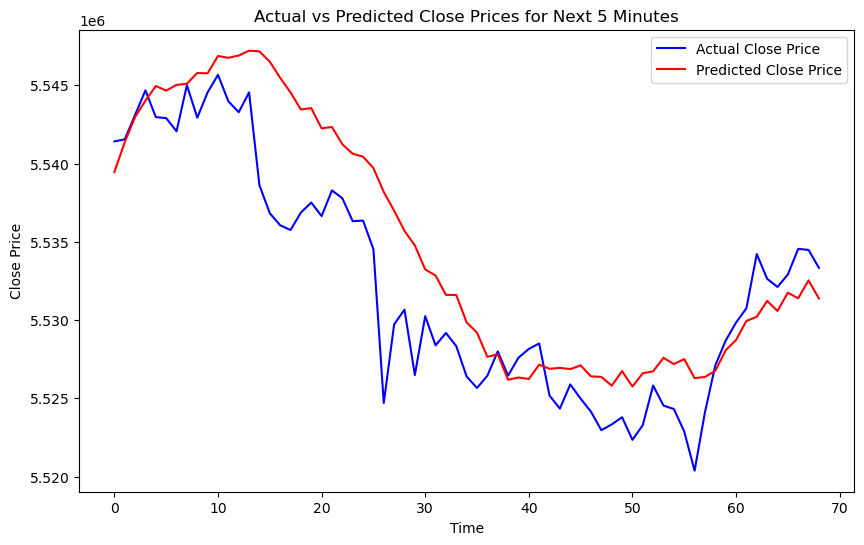

In [362]:
predicted = model.predict(X_test)

predicted_close = scaler.inverse_transform(np.concatenate([predicted, np.zeros((predicted.shape[0], len(features) - 1))], axis=1))[:, 0]
actual_close = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0] * output_timesteps, len(features) - 1))], axis=1))[:, 0]


plt.figure(figsize=(10, 6))
plt.plot(actual_close[:100], color='blue', label='Actual Close Price')
plt.plot(predicted_close[:100], color='red', label='Predicted Close Price')
plt.title('Actual vs Predicted Close Prices for Next 5 Minutes')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Transformer

In [369]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Transformer Encoder function
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # MultiHeadAttention
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs
    
    # Feedforward Network
    x = Dense(ff_dim, activation="relu")(res)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    return LayerNormalization(epsilon=1e-6)(x + res)

# Input layer
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))  # (timesteps, features)

# Transformer block
x = transformer_encoder(inputs, head_size=64, num_heads=4, ff_dim=128)

# Dense layer
x = Dense(output_timesteps)(x[:, -1, :])  # Take only the last timestep output

model = Model(inputs, x)

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/20
44/44 [==============================] - 23s 121ms/step - loss: 0.5471 - val_loss: 0.0086
Epoch 2/20
44/44 [==============================] - 3s 68ms/step - loss: 0.0126 - val_loss: 0.0212
Epoch 3/20
44/44 [==============================] - 3s 63ms/step - loss: 0.0067 - val_loss: 0.0075
Epoch 4/20
44/44 [==============================] - 4s 82ms/step - loss: 0.0048 - val_loss: 0.0082
Epoch 5/20
44/44 [==============================] - 3s 72ms/step - loss: 0.0032 - val_loss: 0.0045
Epoch 6/20
44/44 [==============================] - 3s 78ms/step - loss: 0.0024 - val_loss: 0.0046
Epoch 7/20
44/44 [==============================] - 3s 66ms/step - loss: 0.0018 - val_loss: 0.0071
Epoch 8/20
44/44 [==============================] - 3s 68ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 9/20
44/44 [==============================] - 3s 69ms/step - loss: 0.0012 - val_loss: 0.0035
Epoch 10/20
44/44 [==============================] - 2s 53ms/step - loss: 9.4975e-04 - val_loss: 0.0037
Epo

In [370]:
predicted.shape

(69, 30, 1)

In [371]:
y_test.shape

(69, 1)

3/3 [==============================] - 1s 14ms/step


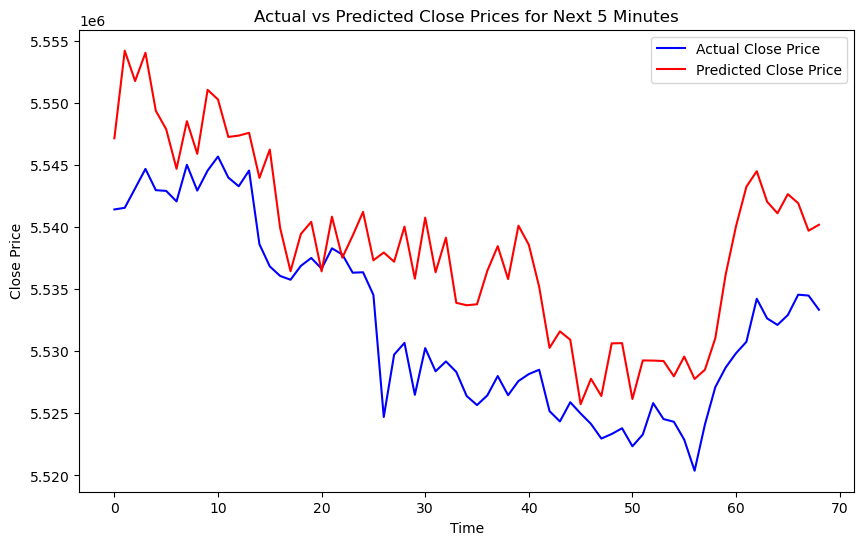

In [372]:
predicted = model.predict(X_test)

predicted_close = scaler.inverse_transform(np.concatenate([predicted, np.zeros((predicted.shape[0], len(features) - 1))], axis=1))[:, 0]
actual_close = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], len(features) - 1))], axis=1))[:, 0]

plt.figure(figsize=(10, 6))
plt.plot(actual_close[:100], color='blue', label='Actual Close Price')
plt.plot(predicted_close[:100], color='red', label='Predicted Close Price')
plt.title('Actual vs Predicted Close Prices for Next 5 Minutes')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# FB Prophet

In [373]:
!pip install prophet



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB 991.0 kB/s eta 0:00:14
   ---------------------------------------- 0.1/13.3 MB 1.3 MB/s eta 0:00:11
    --------------------------------------- 0.2/13.3 MB 1.6 MB/s eta 0:00:09
    --------------------------------------- 0.2/13.3 MB 1.6 MB/s eta 0:00:09
    --------------------------------------- 0.2/13.3 MB 1.0 MB/s eta 0:00:13
   - -------------------------------------- 0.4/13.3 MB 1.3 MB/s eta 0:00:10
   - -------------------------------------- 0.5/13.3 MB 1.6 MB/s eta 0:00:08
   -- ------------------------------------- 0.7/13.3 MB 1.9 MB/s eta 0:00:07
   -- ------------------------------------- 0.8/13.3 MB 2.0 MB/s eta 0:00:07
   --- ------------------------------------ 1.0/13.3 MB 2.2 MB/s eta 0:00:06
   --- ------------------------------------ 1.1/13.3 MB 2.2 MB/s eta 0:00:06
   --- ------------------------------------ 1.3/13.3 MB 2.4 MB/s eta 0:00:06
   

In [374]:
df['startTime'] = df.index

12:35:43 - cmdstanpy - INFO - Chain [1] start processing
12:35:43 - cmdstanpy - INFO - Chain [1] done processing


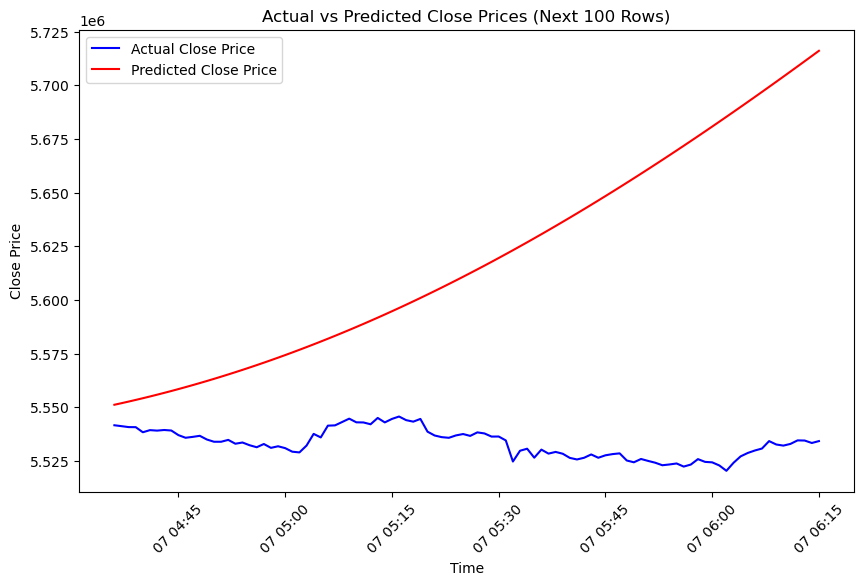

In [379]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

df_prophet = df[['startTime', 'close']].rename(columns={'startTime': 'ds', 'close': 'y'})

train_df_prophet = df_prophet.iloc[:1400]
test_df_prophet = df_prophet.iloc[1400:1500]

# Prophet model 
model = Prophet(daily_seasonality=True)
model.fit(train_df_prophet)

# future dataframe for the next 100 rows (minutes)
future = model.make_future_dataframe(periods=100, freq='T')  

forecast = model.predict(future)


predicted_close = forecast['yhat'].iloc[-100:].values

plt.figure(figsize=(10, 6))
plt.plot(test_df_prophet['ds'], test_df_prophet['y'], color='blue', label='Actual Close Price')
plt.plot(test_df_prophet['ds'], predicted_close, color='red', label='Predicted Close Price')
plt.title('Actual vs Predicted Close Prices (Next 100 Rows)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [380]:
forecast

ds         trend    yhat_lower    yhat_upper  \
0    2024-10-06 05:13:00  5.704928e+06  5.389503e+06  5.405841e+06   
1    2024-10-06 05:14:00  5.704416e+06  5.389927e+06  5.405388e+06   
2    2024-10-06 05:15:00  5.703904e+06  5.389333e+06  5.404885e+06   
3    2024-10-06 05:16:00  5.703391e+06  5.389119e+06  5.404739e+06   
4    2024-10-06 05:17:00  5.702879e+06  5.388744e+06  5.404468e+06   
...                  ...           ...           ...           ...   
1495 2024-10-07 06:11:00  5.969900e+06  5.653822e+06  5.751379e+06   
1496 2024-10-07 06:12:00  5.971126e+06  5.656330e+06  5.754940e+06   
1497 2024-10-07 06:13:00  5.972353e+06  5.657842e+06  5.758097e+06   
1498 2024-10-07 06:14:00  5.973579e+06  5.661022e+06  5.760749e+06   
1499 2024-10-07 06:15:00  5.974805e+06  5.661271e+06  5.764693e+06   

       trend_lower   trend_upper  additive_terms  additive_terms_lower  \
0     5.704928e+06  5.704928e+06  -307070.930481        -307070.930481   
1     5.704416e+06  5.704416e+06  -306816.255991        -306816.255991   
2     5.703904e+06  5.703904e+06  -306541.906307        -306541.906307   
3     5.703391e+06  5.703391e+06  -306247.960919        -306247.960919   
4     5.702879e+06  5.702879e+06  -305934.502794        -305934.502794   
...            ...           ...             ...                   ...   
1495  5.919096e+06  6.014426e+06  -263538.583132        -263538.583132   
1496  5.919877e+06  6.016291e+06  -262365.490964        -262365.490964   
1497  5.920373e+06  6.018531e+06  -261181.864504        -261181.864504   
1498  5.920845e+06  6.020513e+06  -259987.915007        -259987.915007   
1499  5.921131e+06  6.022664e+06  -258783.854489        -258783.854489   

      additive_terms_upper          daily    daily_lower    daily_upper  \
0           -307070.930481 -307070.930481 -307070.930481 -307070.930481   
1           -306816.255991 -306816.255991 -306816.255991 -306816.255991   
2           -306541.906307 -306541.906307 -306541.906307 -306541.906307   
3           -306247.960919 -306247.960919 -306247.960919 -306247.960919   
4           -305934.502794 -305934.502794 -305934.502794 -305934.502794   
...                    ...            ...            ...            ...   
1495        -263538.583132 -263538.583132 -263538.583132 -263538.583132   
1496        -262365.490964 -262365.490964 -262365.490964 -262365.490964   
1497        -261181.864504 -261181.864504 -261181.864504 -261181.864504   
1498        -259987.915007 -259987.915007 -259987.915007 -259987.915007   
1499        -258783.854489 -258783.854489 -258783.854489 -258783.854489   

      multiplicative_terms  multiplicative_terms_lower  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   
...                    ...                         ...   
1495                   0.0                         0.0   
1496                   0.0                         0.0   
1497                   0.0                         0.0   
1498                   0.0                         0.0   
1499                   0.0                         0.0   

      multiplicative_terms_upper          yhat  
0                            0.0  5.397857e+06  
1                            0.0  5.397600e+06  
2                            0.0  5.397362e+06  
3                            0.0  5.397143e+06  
4                            0.0  5.396944e+06  
...                          ...           ...  
1495                         0.0  5.706362e+06  
1496                         0.0  5.708761e+06  
1497                         0.0  5.711171e+06  
1498                         0.0  5.713591e+06  
1499                         0.0  5.716021e+06  

[1500 rows x 16 columns]

# Temporal Fusion Transformer

In [381]:
!pip install pytorch-lightning
!pip install pytorch-forecasting

   ---------------------------------------- 0.0/815.2 kB ? eta -:--:--
   ---- ----------------------------------- 92.2/815.2 kB 2.6 MB/s eta 0:00:01
   ---------------- ----------------------- 327.7/815.2 kB 2.5 MB/s eta 0:00:01
   --------------------------- ------------ 553.0/815.2 kB 2.5 MB/s eta 0:00:01
   ------------------------------------ --- 737.3/815.2 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 815.2/815.2 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/869.2 kB ? eta -:--:--
   -------- ------------------------------- 174.1/869.2 kB 5.3 MB/s eta 0:00:01
   -------------- ------------------------- 317.4/869.2 kB 3.9 MB/s eta 0:00:01
   -------------------- ------------------- 450.6/869.2 kB 3.5 MB/s eta 0:00:01
   -------------------------------------- - 829.4/869.2 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 869.2/869.2 kB 3.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/177.6 kB ? eta -:--:--
   ------------- -------------------------- 61.4/177.6 kB 1.7 MB/s eta 0:00:01
   -------------------- ------------------- 92.2/177.6 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------  174.1/177.6 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 177.6/177.6 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/811.0 kB ? eta -:--:--
    --------------------------------------- 10.2/811.0 kB ? eta -:--:--
    --------------------------------------- 10.2/811.0 kB ? eta -:--:--
   ----- -------------------------------- 112.6/811.0 kB 930.9 kB/s eta 0:00:01
   ----- -------------------------------- 122.9/811.0 kB 717.5 kB/s eta 0:00:01
   --------- ---------------------------- 194.6/811.0 kB 841.6 kB/s eta 0:00:01
   ----------- -------------------------- 235.5/811.0 kB 846.9 kB/s eta 0:00:01
   -------------- ----------------------- 307.2/811.0 kB 948.8 kB/s eta 0:00


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [491]:
import pandas as pd
import torch
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
from pytorch_forecasting.data import GroupNormalizer
from lightning.pytorch import Trainer
from pytorch_forecasting.metrics import MAE
import matplotlib.pyplot as plt

df['startTime'] = pd.to_datetime(df.index)

df_tft = df[['startTime', 'close', 'volume', 'high', 'low']].dropna()

df_tft['time_idx'] = range(1, len(df_tft) + 1)

# dummy group ID since the dataset does not have multiple groups
df_tft['group_id'] = 0  

# max prediction and encoder length
max_prediction_length = 1  # Predicting one step ahead
max_encoder_length = 30     # Using the past 30 minutes of data to make predictions

assert len(df_tft) >= max_encoder_length + max_prediction_length, "Not enough data for the specified lengths."

# Split the dataset: training data (all but last 128 rows) and validation data (last 128 rows)
train_df = df_tft[:-64]
val_df = df_tft[-64:]

# TimeSeriesDataSet for training
train_dataset = TimeSeriesDataSet(
    train_df,
    time_idx='time_idx',
    target='close',
    group_ids=['group_id'],  
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    time_varying_unknown_reals=['volume', 'high', 'low'],
    time_varying_known_reals=['time_idx'],
    allow_missing_timesteps=True
)

# TimeSeriesDataSet for validation
val_dataset = TimeSeriesDataSet(
    val_df,
    time_idx='time_idx',
    target='close',
    group_ids=['group_id'], 
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    time_varying_unknown_reals=['volume', 'high', 'low'],
    time_varying_known_reals=['time_idx'],
    allow_missing_timesteps=True
)

# Dataloaders
train_dataloader = train_dataset.to_dataloader(train=True, batch_size=64, num_workers=0, drop_last=True)
val_dataloader = val_dataset.to_dataloader(train=False, batch_size=64, num_workers=0, drop_last=True)

# Temporal Fusion Transformer (TFT) model
tft = TemporalFusionTransformer.from_dataset(train_dataset, learning_rate=0.03)


trainer = Trainer(max_epochs=10)  
trainer.fit(tft, train_dataloaders=train_dataloader) 


C:\Users\bhave\anaconda3\Lib\site-packages\lightning\pytorch\utilities\parsing.py:208: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
C:\Users\bhave\anaconda3\Lib\site-packages\lightning\pytorch\utilities\parsing.py:208: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
C:\Users\bhave\anaconda3\Lib\site-packages\pytorch_forecasting\models\temporal_fusion_transformer\__init__.py:143: UserWarning:

In pytorch-forecasting models, on versions 1.1.X, the default optimizer defaults to 'adam', if pytorch_optimizer is not installed, otherwise it defaults to 'ranger' from pytorch_optimizer. From version 1.2.0, the default optimizer will be 'adam' regardless of whether pytorch_optimizer is installed, in order to minimize the 

Training: |                                                                                      | 0/? [00:00<…

C:\Users\bhave\anaconda3\Lib\site-packages\lightning\pytorch\loops\training_epoch_loop.py:389: ReduceLROnPlateau conditioned on metric val_loss which is not available but strict is set to `False`. Skipping learning rate update.


In [492]:
best_model_path = trainer.checkpoint_callback.best_model_path
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

In [518]:
predictions = best_tft.predict(val_dataloader, return_y=True, trainer_kwargs=dict(accelerator="cpu"))

# MAE for validation
mae = MAE()(predictions.output, predictions.y)
print(f'MAE on validation data: {mae}')

from pytorch_forecasting.metrics import RMSE

# RMSE for validation
mse = RMSE()(predictions.output, predictions.y)
print(f'MSE on validation data: {mse}')

MAE on validation data: 6129.08837890625
MSE on validation data: 6528.27197265625


C:\Users\bhave\anaconda3\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


C:\Users\bhave\anaconda3\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


{'time_idx': <Figure size 1000x500 with 2 Axes>,
 'volume': <Figure size 1000x500 with 2 Axes>,
 'high': <Figure size 1000x500 with 2 Axes>,
 'low': <Figure size 1000x500 with 2 Axes>}

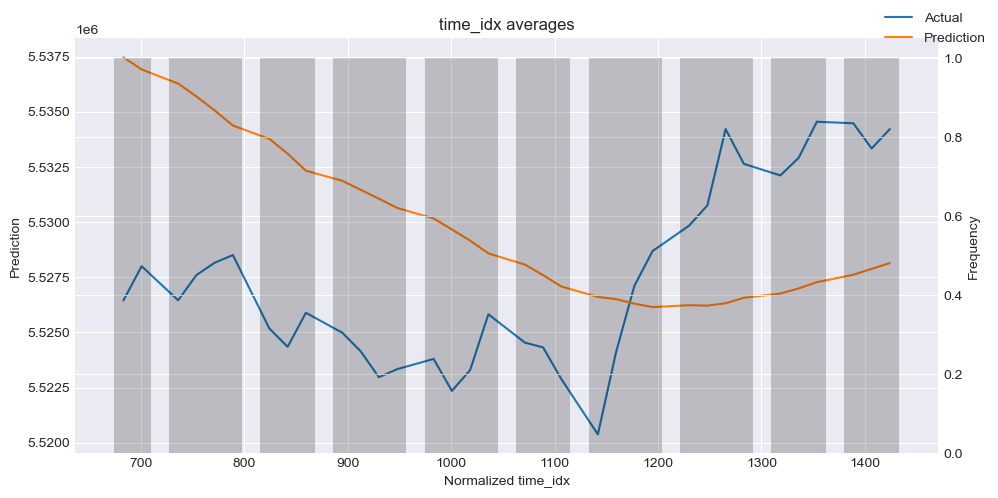

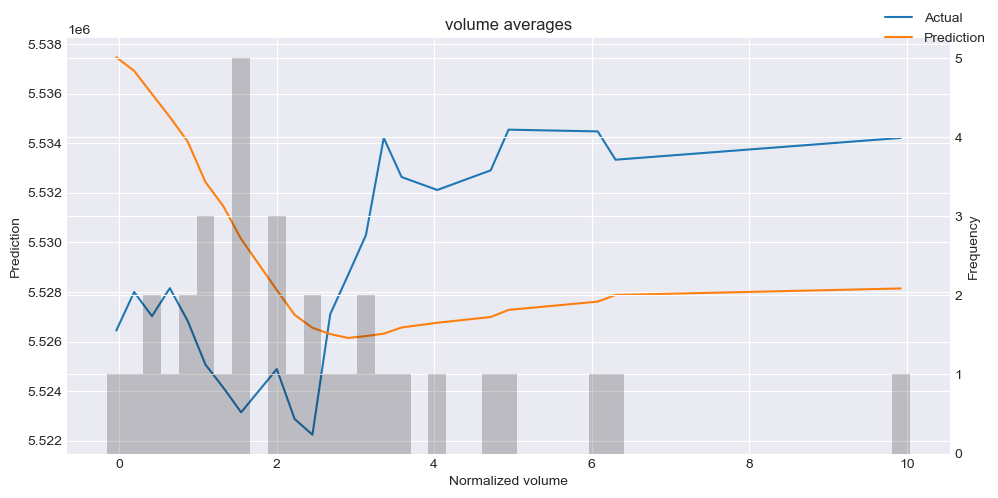

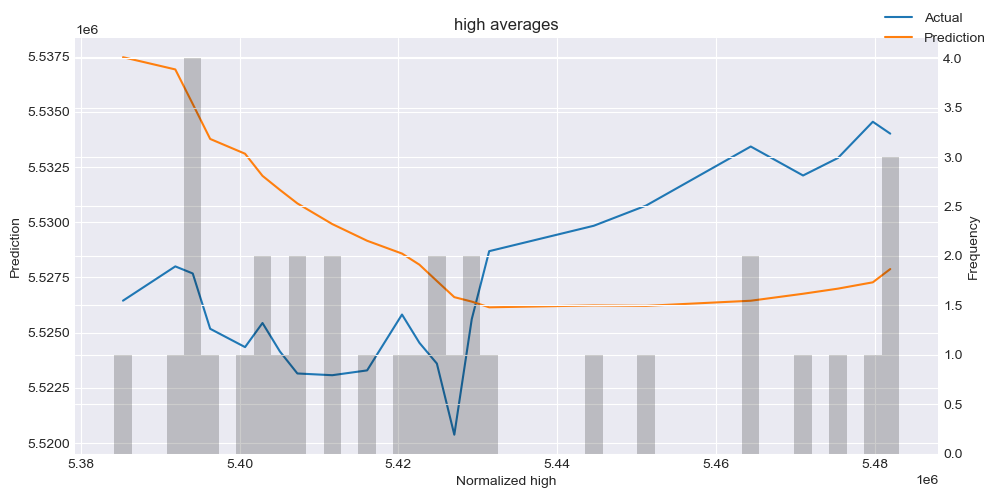

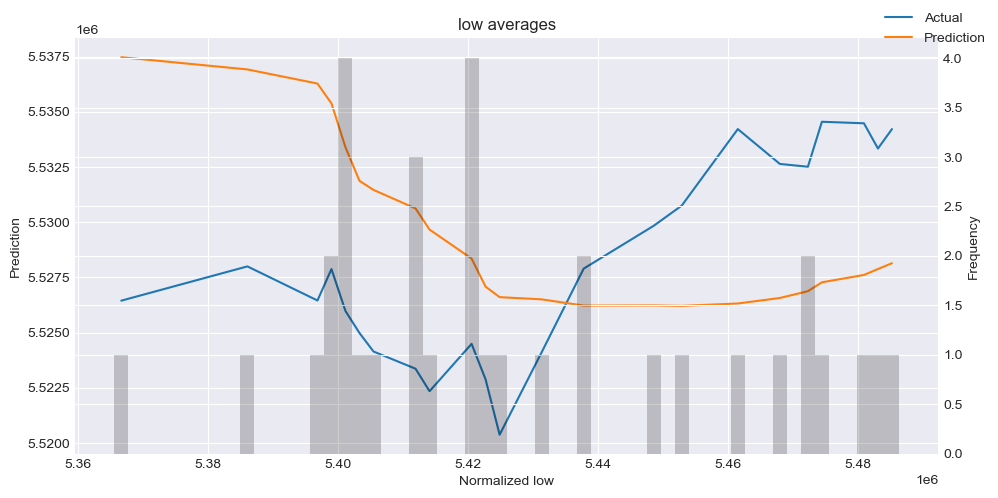

In [545]:
predictions = best_tft.predict(val_dataloader, return_x=True)
predictions_vs_actuals = best_tft.calculate_prediction_actual_by_variable(predictions.x, predictions.output)
best_tft.plot_prediction_actual_by_variable(predictions_vs_actuals)

In [547]:
predictions = best_tft.predict(val_dataloader, mode="raw", return_x=True)

C:\Users\bhave\anaconda3\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


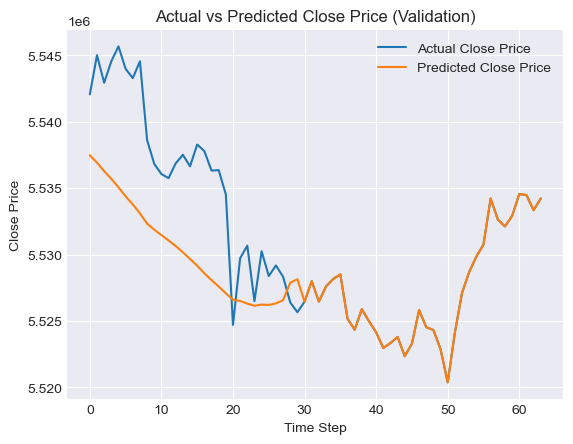

In [562]:
plt.plot(val_df.close.values, label='Actual Close Price')
plt.plot(predicted_close, label='Predicted Close Price')
plt.title('Actual vs Predicted Close Price (Validation)')
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Linear Regression

In [569]:
features = ['open', 'high', 'low', 'close', 'volume', 'hour', 'day',
       'SMA_10', 'SMA_30', 'EMA_10', 'TR', 'ATR', '+DM', '-DM', '+DI', '-DI',
       'DX', 'ADX', 'SMA_TP', 'MAD', 'CCI', 'ROC', 'Highest_High',
       'Lowest_Low', 'Williams_%R', 'Stoch_%K', 'Stoch_%D', 'returns',
       'volatility', 'RSI', 'MACD', 'prev_close', 'prev_volume', 'close_lag_1',
       'close_lag_60', 'SMA_5', 'EMA_5', 'rolling_volatility', 'rolling_max',
       'rolling_min', 'Bollinger_High', 'Bollinger_Low', 'target']
df_features = df[features]

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_features)

scaled_df = pd.DataFrame(scaled_data, columns=features)

input_timesteps = 30  # 30 minutes input
output_timesteps = 1  # 5 minutes prediction

X, y = [], []

# Input sequences (30 timesteps) and corresponding output sequences (next 1 timesteps close price)
for i in range(len(scaled_df) - input_timesteps - output_timesteps):
    X.append(scaled_df.iloc[i:i + input_timesteps].values)   # Input: 30 timesteps of features
    y.append(scaled_df['close'].iloc[i + input_timesteps:i + input_timesteps + output_timesteps].values)  # Output: 1 future close prices

X, y = np.array(X), np.array(y)

# Train-test split (first 1400 rows for training)
train_size = 1400
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [580]:
actual_close = df.close[-69:].values

In [581]:
actual_close

array([5541543., 5543104., 5544674., 5542964., 5542903., 5542058.,
       5545005., 5542930., 5544543., 5545668., 5543976., 5543278.,
       5544543., 5538613., 5536826., 5536058., 5535753., 5536869.,
       5537506., 5536642., 5538282., 5537785., 5536320., 5536355.,
       5534532., 5524705., 5529727., 5530669., 5526492., 5530251.,
       5528385., 5529178., 5528332., 5526396., 5525664., 5526449.,
       5528001., 5526457., 5527600., 5528158., 5528507., 5525176.,
       5524347., 5525891., 5524984., 5524147., 5522969., 5523336.,
       5523798., 5522350., 5523292., 5525821., 5524539., 5524321.,
       5522882., 5520380., 5524112., 5527111., 5528690., 5529841.,
       5530756., 5534218., 5532640., 5532117., 5532910., 5534550.,
       5534480., 5533338., 5534218.])

Linear Regression MSE: 12515024.260224765


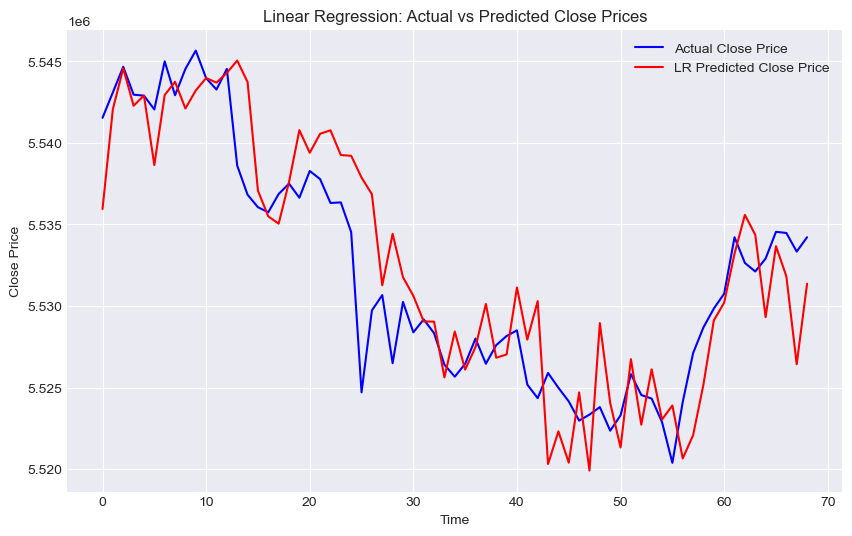

In [582]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train_lr = X_train.reshape(X_train.shape[0], -1)  
X_test_lr = X_test.reshape(X_test.shape[0], -1)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train)
lr_predicted = lr_model.predict(X_test_lr)

# Inverse transform the predicted 'close' price for comparison
lr_predicted_close = scaler.inverse_transform(np.concatenate([lr_predicted, np.zeros((lr_predicted.shape[0], len(features) - 1))], axis=1))[:, 0]

# MSE for Linear Regression
lr_mse = mean_squared_error(actual_close, lr_predicted_close)
print(f'Linear Regression MSE: {lr_mse}')

plt.figure(figsize=(10, 6))
plt.plot(actual_close, color='blue', label='Actual Close Price')
plt.plot(lr_predicted_close[:100], color='red', label='LR Predicted Close Price')
plt.title('Linear Regression: Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


# RF

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_lr, y_train)
rf_predicted = rf_model.predict(X_test_lr)



Random Forest MSE: 17075294.499639448


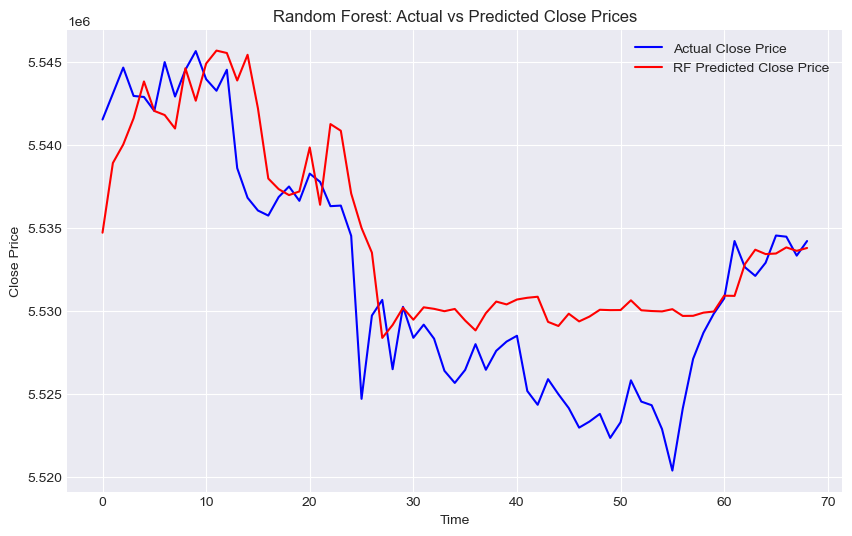

In [584]:
rf_predicted = rf_predicted.reshape(-1, 1)

# Inverse transform the predicted 'close' price for comparison
rf_predicted_close = scaler.inverse_transform(np.concatenate([rf_predicted, np.zeros((rf_predicted.shape[0], len(features) - 1))], axis=1))[:, 0]

# MSE for Random Forest
rf_mse = mean_squared_error(actual_close, rf_predicted_close)
print(f'Random Forest MSE: {rf_mse}')

plt.figure(figsize=(10, 6))
plt.plot(actual_close[:100], color='blue', label='Actual Close Price')
plt.plot(rf_predicted_close[:100], color='red', label='RF Predicted Close Price')
plt.title('Random Forest: Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()



# XGB

In [ ]:
import xgboost as xgb

# XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train_lr, y_train)

xgb_predicted = xgb_model.predict(X_test_lr)


XGBoost MSE: 10463505.157760512


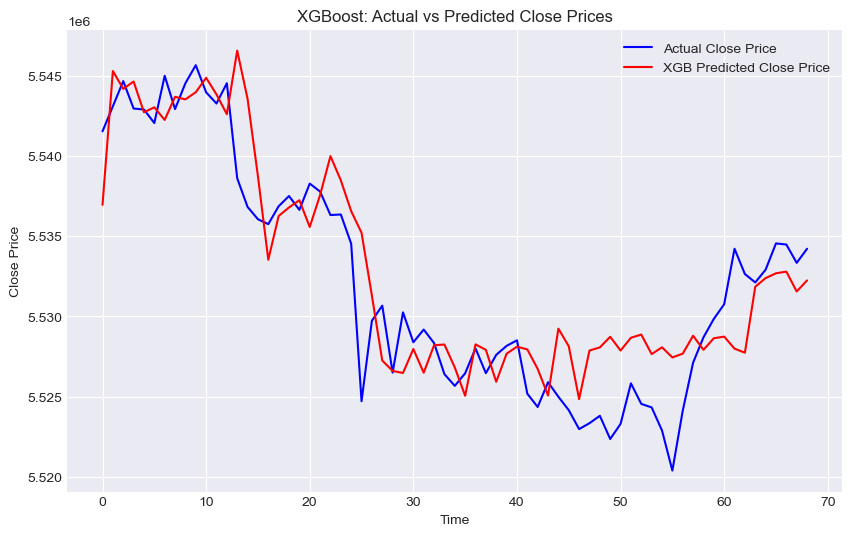

In [586]:
xgb_predicted = xgb_predicted.reshape(-1, 1)

# Inverse transform the predicted 'close' price for comparison
xgb_predicted_close = scaler.inverse_transform(np.concatenate([xgb_predicted, np.zeros((xgb_predicted.shape[0], len(features) - 1))], axis=1))[:, 0]

# MSE for XGBoost
xgb_mse = mean_squared_error(actual_close, xgb_predicted_close)
print(f'XGBoost MSE: {xgb_mse}')

plt.figure(figsize=(10, 6))
plt.plot(actual_close[:100], color='blue', label='Actual Close Price')
plt.plot(xgb_predicted_close[:100], color='red', label='XGB Predicted Close Price')
plt.title('XGBoost: Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# NBeats

In [592]:
X_train.shape

(1400, 30, 43)

Epoch 1/20
44/44 [==============================] - 3s 27ms/step - loss: 0.0675 - val_loss: 0.0024
Epoch 2/20
44/44 [==============================] - 1s 22ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 3/20
44/44 [==============================] - 1s 19ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 4/20
44/44 [==============================] - 1s 24ms/step - loss: 0.0017 - val_loss: 9.2887e-04
Epoch 5/20
44/44 [==============================] - 1s 26ms/step - loss: 6.6730e-04 - val_loss: 0.0011
Epoch 6/20
44/44 [==============================] - 1s 22ms/step - loss: 3.6877e-04 - val_loss: 9.0807e-04
Epoch 7/20
44/44 [==============================] - 1s 21ms/step - loss: 5.7189e-04 - val_loss: 5.8724e-04
Epoch 8/20
44/44 [==============================] - 1s 19ms/step - loss: 4.9918e-04 - val_loss: 8.2692e-04
Epoch 9/20
44/44 [==============================] - 1s 24ms/step - loss: 0.0013 - val_loss: 0.0036
Epoch 10/20
44/44 [==============================] - 1s 20ms/step - loss: 9.1

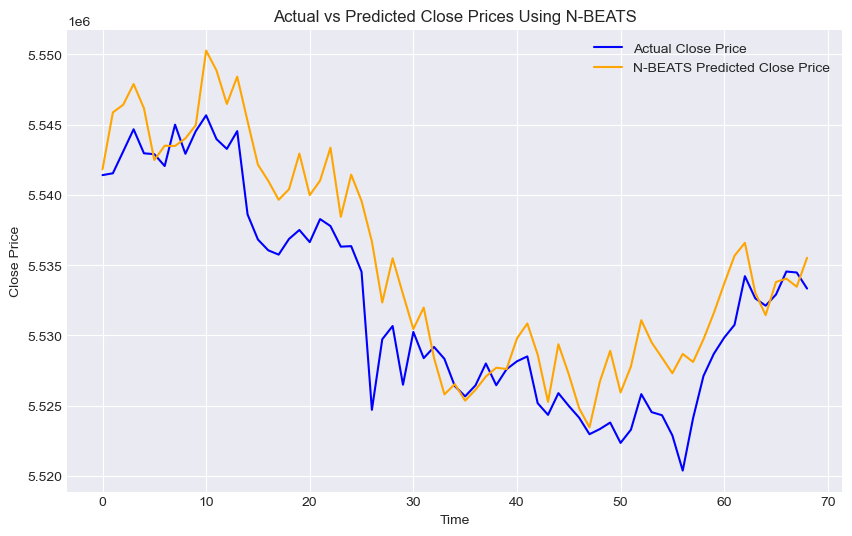

In [594]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten

# N-BEATS model
def build_nbeats_model(input_shape):
    model = Sequential()
    
    # Dense Block (Basis Expansion Block)
    for _ in range(3):
        model.add(Flatten(input_shape=input_shape))  # Flatten the input for dense layers
        model.add(Dense(256, activation='relu'))
    
    # Output layer for forecasting
    model.add(Dense(1))  # Change output to 1 for predicting next close price

    # Compile 
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# N-BEATS model
nbeats_model = build_nbeats_model((X_train.shape[1], X_train.shape[2]))
nbeats_history = nbeats_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

nbeats_predicted = nbeats_model.predict(X_test)

# Inverse transform the predicted 'close' price for comparison
zeros_array = np.zeros((nbeats_predicted.shape[0], len(features) - 1))
combined_predicted = np.concatenate([nbeats_predicted, zeros_array], axis=1)

# Inverse transform the predictions
nbeats_predicted_close = scaler.inverse_transform(combined_predicted)[:, 0]
actual_close = scaler.inverse_transform(np.concatenate([y_test, np.zeros((y_test.shape[0], len(features) - 1))], axis=1))[:, 0]

plt.figure(figsize=(10, 6))
plt.plot(actual_close[:100], color='blue', label='Actual Close Price')
plt.plot(nbeats_predicted_close[:100], color='orange', label='N-BEATS Predicted Close Price')
plt.title('Actual vs Predicted Close Prices Using N-BEATS')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [591]:
nbeats_predicted = nbeats_predicted.reshape(nbeats_predicted.shape[0], -1)

print(f'nbeats_predicted shape: {nbeats_predicted.shape}')

nbeats_predicted shape: (69, 30)


# Seq2Seq with Attention

In [596]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Input, Dense, dot, Activation, concatenate, TimeDistributed

def build_seq2seq_attention(input_shape):
    inputs = Input(shape=input_shape)

    # Encoder
    encoder_lstm = LSTM(64, return_sequences=True, return_state=True)
    encoder_outputs, state_h, state_c = encoder_lstm(inputs)

    # Decoder
    decoder_lstm = LSTM(64, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(encoder_outputs, initial_state=[state_h, state_c])

    # Attention Mechanism
    attention = dot([decoder_outputs, encoder_outputs], axes=[2, 2])
    attention = Activation('softmax')(attention)
    context = dot([attention, encoder_outputs], axes=[2, 1])

    # Concatenate context with decoder outputs
    decoder_combined_context = concatenate([context, decoder_outputs])

    # Output
    output_dense = TimeDistributed(Dense(output_timesteps))
    outputs = output_dense(decoder_combined_context)

    # Model
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

# eq2Seq with Attention
seq2seq_attention_model = build_seq2seq_attention((X_train.shape[1], X_train.shape[2]))
seq2seq_attention_history = seq2seq_attention_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

seq2seq_attention_predicted = seq2seq_attention_model.predict(X_test)

print(f"Predicted shape: {seq2seq_attention_predicted.shape}")

seq2seq_attention_predicted_reshaped = seq2seq_attention_predicted.reshape(seq2seq_attention_predicted.shape[0], -1)

# Prepare zeros array for inverse transformation
zeros_array = np.zeros((seq2seq_attention_predicted_reshaped.shape[0], len(features) - 1))

# Inverse transform predictions
seq2seq_attention_predicted_close = scaler.inverse_transform(np.concatenate([seq2seq_attention_predicted_reshaped, zeros_array], axis=1))[:, 0]

# Inverse transform actual close prices
actual_close = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), 
                                    np.zeros((y_test.shape[0], len(features) - 1))], axis=1))[:, 0]

plt.figure(figsize=(10, 6))
plt.plot(actual_close[:100], color='blue', label='Actual Close Price')
plt.plot(seq2seq_attention_predicted_close[:100], color='red', label='Seq2Seq with Attention Predicted Close Price')
plt.title('Seq2Seq with Attention: Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Epoch 1/20
44/44 [==============================] - 13s 129ms/step - loss: 0.0105 - val_loss: 0.0014
Epoch 2/20
44/44 [==============================] - 3s 71ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 3/20
44/44 [==============================] - 3s 73ms/step - loss: 0.0010 - val_loss: 9.9251e-04
Epoch 4/20
44/44 [==============================] - 3s 71ms/step - loss: 7.9571e-04 - val_loss: 9.6963e-04
Epoch 5/20
44/44 [==============================] - 3s 68ms/step - loss: 6.6987e-04 - val_loss: 7.4698e-04
Epoch 6/20
44/44 [==============================] - 3s 74ms/step - loss: 5.6007e-04 - val_loss: 8.1434e-04
Epoch 7/20
44/44 [==============================] - 3s 68ms/step - loss: 5.0192e-04 - val_loss: 4.1460e-04
Epoch 8/20
44/44 [==============================] - 3s 72ms/step - loss: 4.3899e-04 - val_loss: 6.3204e-04
Epoch 9/20
44/44 [==============================] - 3s 70ms/step - loss: 3.5806e-04 - val_loss: 2.7547e-04
Epoch 10/20
44/44 [==============================] - 3s

ValueError: operands could not be broadcast together with shapes (69,72) (43,) (69,72) 

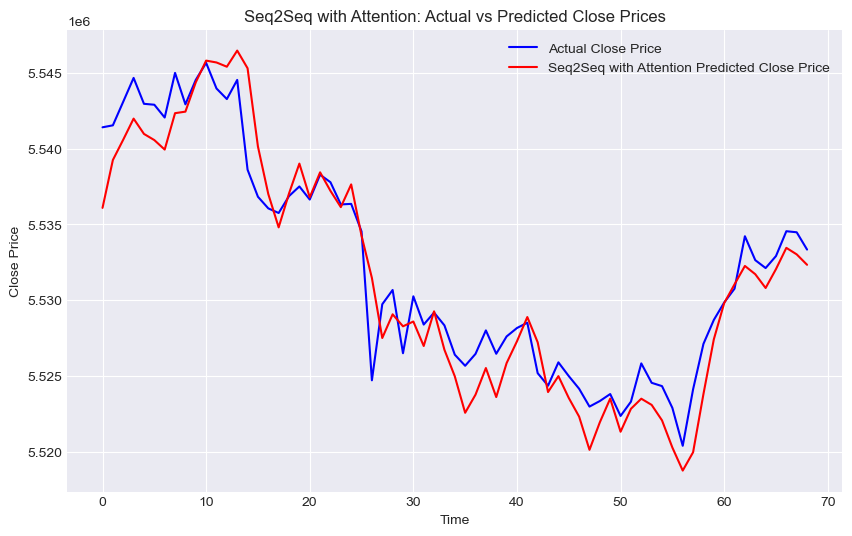

In [597]:
seq2seq_attention_predicted_reshaped = seq2seq_attention_predicted.squeeze()

seq2seq_attention_predicted_close = seq2seq_attention_predicted_reshaped[:, -1]  # Get the last timestep predictions

# Create a zeros array with the shape of (69, len(features) - 1)
zeros_array = np.zeros((seq2seq_attention_predicted_close.shape[0], len(features) - 1))

combined_predicted = np.concatenate([seq2seq_attention_predicted_close.reshape(-1, 1), zeros_array], axis=1)

# Inverse transform predictions
seq2seq_attention_predicted_close_final = scaler.inverse_transform(combined_predicted)[:, 0]

# Inverse transform actual close prices
actual_close = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), 
                                     np.zeros((y_test.shape[0], len(features) - 1))], axis=1))[:, 0]

plt.figure(figsize=(10, 6))
plt.plot(actual_close[:100], color='blue', label='Actual Close Price')
plt.plot(seq2seq_attention_predicted_close_final[:100], color='red', label='Seq2Seq with Attention Predicted Close Price')
plt.title('Seq2Seq with Attention: Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()